In [1]:
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt
from scipy import interpolate
file_name = "instrument_data_test1.h5"
h5_file = h5py.File(file_name, "r")

In [2]:
def create_list_of_datasets_in_h5file(h5_file):
    """
    Returns a list of the paths of all datasets in an h5 file.
    Can also be used to list all datasets under a given node (e.g., f['session001']).  In this case,
    the 'session001' is not included in the output paths.
    This comes from:
    https://stackoverflow.com/questions/44883175/how-to-list-all-datasets-in-h5py-file
    :param f:
    :return:
    """
    keys = []
    h5_file.visit(lambda key: keys.append(key) if type(h5_file[key]) is h5py._hl.dataset.Dataset else None)
    return keys


def create_list_of_groups_in_node(node):
    keys = []
    node.visit(lambda key: keys.append(key) if type(node[key]) is h5py._hl.group.Group else None)
    return keys

def create_list_of_items_in_node(item_type, h5_file, node):
    keys = []
    if item_type == "group":
        my_type = h5py._hl.group.Group
    if item_type == "dataset":
        my_type = h5py._hl.dataset.Dataset
    h5_file[node].visit(lambda key: keys.append(key) if type(h5_file[node][key]) is my_type else None)
    return keys

def create_list_of_insertions_in_node(h5_file, node):
    insertions = []
    all_groups = create_list_of_items_in_node("group", h5_file, node)
    for group in all_groups:
        if group[-6:-3] == 'ins':
            insertions.append(group)
    return insertions

def create_session_insertion_dict(h5_file):
    keys = list(h5_file.keys())
    key_dict = {}
    for key in keys:
        # session_number = int(key[-3:])
        key_dict[key] = create_list_of_insertions_in_node(h5_file, key)
    print(key_dict)
    return key_dict

def create_list_of_calibrations_in_node(h5_file, node):
    calibrations = []
    all_groups = create_list_of_items_in_node("group", h5_file, node)
    for group in all_groups:
        if group[-6:-3] == 'cal':
            calibrations.append(group)
    return calibrations


def create_session_calibration_dict(h5_file):
    keys = list(h5_file.keys())
    key_dict = {}
    for key in keys:
        key_dict[key] = create_list_of_calibrations_in_node(h5_file, key)
    print(key_dict)
    return key_dict

def get_wavelengths_vector(h5_file, session, insertion, spectrometer):
    if spectrometer == "spectrometer1":
        vector_attr = "spec1_wavelengths_vector"
    elif spectrometer == "spectrometer2":
        vector_attr = "spec2_wavelengths_vector"
    else:
        print("spectrometer not specified")
        vector_attr = ""

    insertion_group = h5_file[f"{session}/{insertion}"]
    wavelengths_vector = insertion_group.parent.attrs[vector_attr][:]
    return wavelengths_vector

def get_absorbance_spectra_in_insertion(h5_file, session, insertion):
    absorbance_string = "spectrometer1/derived/absorbances"
    absorbance_spectra = h5_file[f"{session}/{insertion}/{absorbance_string}"][:]
    print(absorbance_spectra)
    return absorbance_spectra

def get_absorbance_spectra_and_depth_in_insertion(h5_file, session, insertion):
    dset_string = "derived/absorbance_depth"
    dset = h5_file[f"{session}/{insertion}/{dset_string}"]
    absorbance_spectra = dset[:, :-2]
    depths = dset[:, -1]
    forces = dset[:, -2]
    print(absorbance_spectra)
    return absorbance_spectra, depths, forces

def get_current_time():
    return np.datetime64(datetime.datetime.now()).astype(np.int64)


def timestamp_list_to_pandas_timestamps(timestamp_list):
    series = pd.Series(timestamp_list).astype('<M8[us]')
    return series

In [4]:
create_list_of_datasets_in_h5file(h5_file)

['session001/cal001/ins001/derived/absorbance_depth',
 'session001/cal001/ins001/derived/absorbance_depth_timestamps',
 'session001/cal001/ins001/derived/depth_increment_data',
 'session001/cal001/ins001/derived/force_depth',
 'session001/cal001/ins001/derived/force_depth_timestamps',
 'session001/cal001/ins001/encoder/depths',
 'session001/cal001/ins001/encoder/timestamps',
 'session001/cal001/ins001/load_cell/forces',
 'session001/cal001/ins001/load_cell/timestamps',
 'session001/cal001/ins001/spectrometer1/derived/absorbances',
 'session001/cal001/ins001/spectrometer1/spectra',
 'session001/cal001/ins001/spectrometer1/timestamps',
 'session001/cal001/ins002/derived/absorbance_depth',
 'session001/cal001/ins002/derived/absorbance_depth_timestamps',
 'session001/cal001/ins002/derived/depth_increment_data',
 'session001/cal001/ins002/derived/force_depth',
 'session001/cal001/ins002/derived/force_depth_timestamps',
 'session001/cal001/ins002/encoder/depths',
 'session001/cal001/ins002/e

In [5]:
c2_i1_force = 'session002/cal002/ins004/load_cell/forces'

In [6]:
h5_file[c2_i1_force][:]

array([-76041.4, -76045.6, -76037.6, -76040.4, -76031.6, -76030.6,
       -76029.4, -76038.4, -76036.8, -76032. , -76033.8, -76035.2,
       -76044.2, -76046.4, -76022.4, -76034. , -76026.2, -76039.4,
       -76031. , -76025. , -76024. , -76022.8, -76032.6, -76030.4,
       -76027.4, -76038.4, -76014.8, -76030.2, -76031.6, -76019. ,
       -76048. , -76042.8, -76048.2, -76026.4, -76040.4, -76038.8,
       -76026.8, -76028.4, -76033.4, -76024.6, -76033.4, -76024.8,
       -76023.8, -76035.6, -76032.2, -76033.6, -76035.8, -76042.2,
       -76025.4, -76036.2, -76021.4, -76032.2, -76035.8, -76036.8,
       -76034.4, -76036.8, -76028.4, -76034.8, -76026.2, -76026. ,
       -76025.6, -76023. ])

In [7]:
c1_i3_force = 'session001/cal001/ins003/load_cell/forces'

In [9]:
h5_file[c1_i3_force][:]

array([-4.1686000e+03, -2.6126000e+03, -1.6670000e+03, -6.2486000e+03,
       -5.9064000e+03,  6.2574000e+03,  4.1731200e+04,  9.1592200e+04,
        1.1729380e+05,  1.3500000e+05,  1.6097480e+05,  1.7665440e+05,
        1.7607000e+05,  1.7732640e+05,  1.8780800e+05,  1.9448780e+05,
        2.0153440e+05,  2.1986100e+05,  3.1891940e+05,  4.6142280e+05,
        4.9129380e+05,  4.4226740e+05,  2.5937940e+05,  2.6875240e+05,
        2.7595800e+05,  3.0054900e+05,  2.9516760e+05,  2.5134180e+05,
        2.3216060e+05,  2.4776820e+05,  2.4332240e+05,  2.4462260e+05,
        2.5033560e+05,  2.5221260e+05,  2.4647920e+05,  2.4552580e+05,
        2.3970800e+05,  2.5231260e+05,  2.8120480e+05,  3.1454000e+05,
        3.3516220e+05,  4.5343780e+05,  7.5678380e+05,  1.0424526e+06,
        1.1960548e+06,  1.3054220e+06,  1.2558840e+06,  1.2177674e+06,
        1.2004580e+06,  1.1920172e+06,  1.4380622e+06,  1.9087550e+06,
        1.3294876e+06])

In [10]:
abs_depth = 'session001/cal001/ins003/derived/absorbance_depth'

In [12]:
h5_file[abs_depth][:]

array([[ 4.26453561e-01,  4.26515852e-01,  4.26796002e-01, ...,
         4.25060413e-01,  6.25740000e+03, -1.94366390e+00],
       [ 4.79736252e-01,  4.80192315e-01,  4.80415506e-01, ...,
         6.17269445e-01,  4.17312000e+04, -1.10576782e+00],
       [ 4.94275363e-01,  4.93880053e-01,  4.93549482e-01, ...,
         4.69814756e-01,  9.15922000e+04, -1.93908691e-01],
       ...,
       [ 4.62813182e-01,  4.62570850e-01,  4.62255605e-01, ...,
         6.05422260e-01,  1.20045800e+06,  2.25695709e+01],
       [ 4.66531181e-01,  4.66639678e-01,  4.66658941e-01, ...,
         6.11837830e-01,  1.43806220e+06,  2.25696732e+01],
       [ 4.68204577e-01,  4.67811955e-01,  4.67556534e-01, ...,
         6.12762113e-01,  1.90875500e+06,  2.28818893e+01]])

In [13]:
cal = 'session001/cal001'

In [16]:
h5_file[cal].attrs.keys()

<KeysViewHDF5 ['calibration_start_time', 'dark_spectrum', 'nirone_averaging', 'nirone_light_source', 'nirone_measurement_time', 'nirone_spectrometer_connection', 'nirone_wavelengths_setting', 'spec1_wavelengths_vector', 'white_spectrum']>

In [17]:
waves = h5_file[cal].attrs['spec1_wavelengths_vector'][:]

In [18]:
waves

array([1550., 1551., 1552., 1553., 1554., 1555., 1556., 1557., 1558.,
       1559., 1560., 1561., 1562., 1563., 1564., 1565., 1566., 1567.,
       1568., 1569., 1570., 1571., 1572., 1573., 1574., 1575., 1576.,
       1577., 1578., 1579., 1580., 1581., 1582., 1583., 1584., 1585.,
       1586., 1587., 1588., 1589., 1590., 1591., 1592., 1593., 1594.,
       1595., 1596., 1597., 1598., 1599., 1600., 1601., 1602., 1603.,
       1604., 1605., 1606., 1607., 1608., 1609., 1610., 1611., 1612.,
       1613., 1614., 1615., 1616., 1617., 1618., 1619., 1620., 1621.,
       1622., 1623., 1624., 1625., 1626., 1627., 1628., 1629., 1630.,
       1631., 1632., 1633., 1634., 1635., 1636., 1637., 1638., 1639.,
       1640., 1641., 1642., 1643., 1644., 1645., 1646., 1647., 1648.,
       1649., 1650., 1651., 1652., 1653., 1654., 1655., 1656., 1657.,
       1658., 1659., 1660., 1661., 1662., 1663., 1664., 1665., 1666.,
       1667., 1668., 1669., 1670., 1671., 1672., 1673., 1674., 1675.,
       1676., 1677.,

In [25]:
cols = waves.tolist()

In [26]:
cols.append('force')

In [27]:
cols.append('depth')

In [28]:
cols

[1550.0,
 1551.0,
 1552.0,
 1553.0,
 1554.0,
 1555.0,
 1556.0,
 1557.0,
 1558.0,
 1559.0,
 1560.0,
 1561.0,
 1562.0,
 1563.0,
 1564.0,
 1565.0,
 1566.0,
 1567.0,
 1568.0,
 1569.0,
 1570.0,
 1571.0,
 1572.0,
 1573.0,
 1574.0,
 1575.0,
 1576.0,
 1577.0,
 1578.0,
 1579.0,
 1580.0,
 1581.0,
 1582.0,
 1583.0,
 1584.0,
 1585.0,
 1586.0,
 1587.0,
 1588.0,
 1589.0,
 1590.0,
 1591.0,
 1592.0,
 1593.0,
 1594.0,
 1595.0,
 1596.0,
 1597.0,
 1598.0,
 1599.0,
 1600.0,
 1601.0,
 1602.0,
 1603.0,
 1604.0,
 1605.0,
 1606.0,
 1607.0,
 1608.0,
 1609.0,
 1610.0,
 1611.0,
 1612.0,
 1613.0,
 1614.0,
 1615.0,
 1616.0,
 1617.0,
 1618.0,
 1619.0,
 1620.0,
 1621.0,
 1622.0,
 1623.0,
 1624.0,
 1625.0,
 1626.0,
 1627.0,
 1628.0,
 1629.0,
 1630.0,
 1631.0,
 1632.0,
 1633.0,
 1634.0,
 1635.0,
 1636.0,
 1637.0,
 1638.0,
 1639.0,
 1640.0,
 1641.0,
 1642.0,
 1643.0,
 1644.0,
 1645.0,
 1646.0,
 1647.0,
 1648.0,
 1649.0,
 1650.0,
 1651.0,
 1652.0,
 1653.0,
 1654.0,
 1655.0,
 1656.0,
 1657.0,
 1658.0,
 1659.0,
 1660.0,
 

In [29]:
abs_depth_df = pd.DataFrame(data=h5_file[abs_depth][:], columns=cols)

In [30]:
abs_depth_df

1550.0    1551.0    1552.0    1553.0    1554.0    1555.0    1556.0  \
0   0.426454  0.426516  0.426796  0.426960  0.427217  0.427107  0.427127   
1   0.479736  0.480192  0.480416  0.480725  0.480895  0.481067  0.481526   
2   0.494275  0.493880  0.493549  0.492985  0.492631  0.492840  0.492489   
3   0.212074  0.211820  0.211625  0.211306  0.211108  0.210939  0.210558   
4   0.533942  0.534104  0.533824  0.533239  0.533244  0.532820  0.532168   
5   0.530503  0.530365  0.530134  0.529612  0.529546  0.528957  0.528847   
6   0.528434  0.528015  0.527815  0.527473  0.527172  0.526736  0.526265   
7   0.520020  0.519912  0.519846  0.519579  0.518752  0.518539  0.518199   
8   0.525538  0.525612  0.525130  0.524972  0.524575  0.524225  0.523752   
9   0.528600  0.528225  0.527953  0.527727  0.527524  0.527605  0.526913   
10  0.521832  0.521102  0.521046  0.520804  0.520364  0.520388  0.519964   
11  0.441091  0.440564  0.439878  0.439068  0.438760  0.438497  0.438042   
12  0.447645  0.446479  0.445468  0.444408  0.443343  0.442247  0.441194   
13  0.441703  0.440858  0.439590  0.439036  0.437992  0.437131  0.436253   
14  0.489427  0.489337  0.488433  0.488144  0.487826  0.487192  0.486853   
15  0.517709  0.517252  0.517296  0.516854  0.516817  0.516483  0.515743   
16  0.523448  0.523168  0.522706  0.522262  0.521874  0.521777  0.521276   
17  0.521102  0.521145  0.520720  0.520061  0.519823  0.519603  0.519191   
18  0.519857  0.519760  0.519332  0.518957  0.519168  0.519106  0.518382   
19  0.517984  0.517948  0.517743  0.517317  0.517280  0.516805  0.516526   
20  0.519510  0.518937  0.518639  0.518104  0.518110  0.517709  0.517687   
21  0.521445  0.520960  0.520834  0.520603  0.519990  0.519917  0.519488   
22  0.524478  0.524180  0.523875  0.523631  0.523471  0.523422  0.522575   
23  0.521347  0.520977  0.520600  0.520283  0.519812  0.519527  0.519132   
24  0.529675  0.529111  0.528860  0.528621  0.528368  0.527974  0.527490   
25  0.525582  0.525480  0.525432  0.524939  0.524537  0.524536  0.524233   
26  0.489048  0.488761  0.488710  0.487888  0.488168  0.487619  0.487269   
27  0.455308  0.455106  0.455352  0.455185  0.455045  0.455416  0.455378   
28  0.461744  0.461394  0.460966  0.460719  0.460522  0.460328  0.459812   
29  0.456014  0.455728  0.455427  0.455302  0.455208  0.455229  0.454842   
30  0.462813  0.462571  0.462256  0.461992  0.461718  0.461689  0.461204   
31  0.466531  0.466640  0.466659  0.466515  0.465878  0.465979  0.465612   
32  0.468205  0.467812  0.467557  0.467283  0.467190  0.466606  0.466539   

      1557.0    1558.0    1559.0  ...    1943.0    1944.0    1945.0    1946.0  \
0   0.427662  0.427821  0.427862  ...  0.425364  0.425380  0.425374  0.424985   
1   0.481674  0.481975  0.482361  ...  0.617286  0.617695  0.617671  0.617805   
2   0.492502  0.492304  0.491811  ...  0.473295  0.472822  0.472347  0.471963   
3   0.210360  0.210305  0.210186  ...  0.700984  0.702503  0.702283  0.703020   
4   0.532234  0.531863  0.531672  ...  0.704527  0.704584  0.704250  0.704854   
5   0.528681  0.528524  0.528374  ...  0.700929  0.700728  0.700687  0.701205   
6   0.526194  0.525989  0.525670  ...  0.696913  0.696906  0.697416  0.696977   
7   0.518034  0.517856  0.517517  ...  0.698083  0.697244  0.697994  0.697728   
8   0.523595  0.522956  0.523053  ...  0.700114  0.700201  0.699722  0.699835   
9   0.526743  0.526686  0.526547  ...  0.672118  0.672102  0.672021  0.671504   
10  0.519328  0.518842  0.518928  ...  0.594385  0.589526  0.585674  0.581677   
11  0.437925  0.437768  0.437223  ...  0.525087  0.525121  0.524760  0.525275   
12  0.440017  0.438794  0.437647  ...  0.662800  0.663051  0.663086  0.663992   
13  0.435447  0.434615  0.433937  ...  0.699542  0.699827  0.699843  0.699583   
14  0.486335  0.486127  0.485416  ...  0.649710  0.650349  0.651067  0.651282   
15  0.515157  0.514586  0.514004  ...  0.650613  0.650692  0.650479  0.649923   
16  0.520740  0.521277  0.520490  ...  0.697

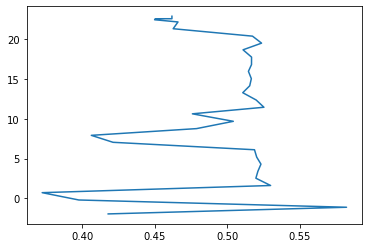

In [31]:
plt.plot(abs_depth_df[1750.0], abs_depth_df['depth'])

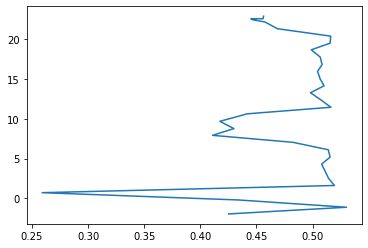

In [32]:
plt.plot(abs_depth_df[1650.0], abs_depth_df['depth'])

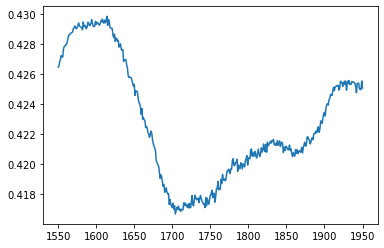

In [34]:
plt.plot(waves, abs_depth_df.iloc[0, :-2])

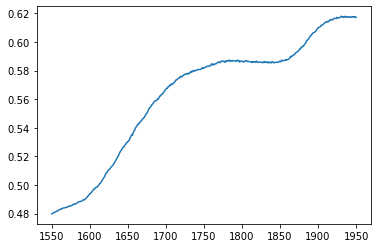

In [35]:
plt.plot(waves, abs_depth_df.iloc[1, :-2])

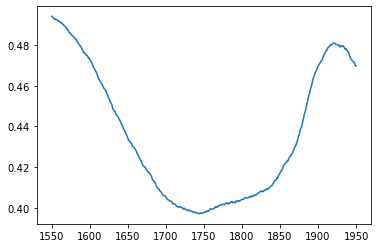

In [36]:
plt.plot(waves, abs_depth_df.iloc[2, :-2])

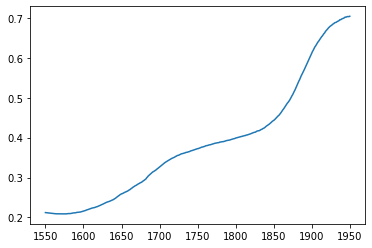

In [37]:
plt.plot(waves, abs_depth_df.iloc[3, :-2])

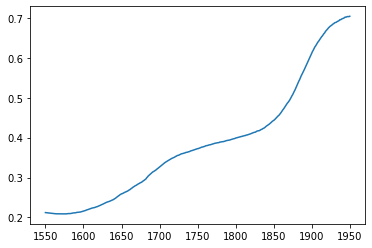

In [38]:
plt.plot(waves, abs_depth_df.iloc[3, :-2])

In [39]:
abs_depth_df.shape

(33, 403)

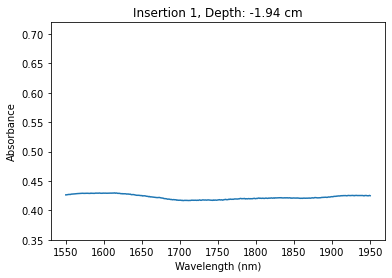

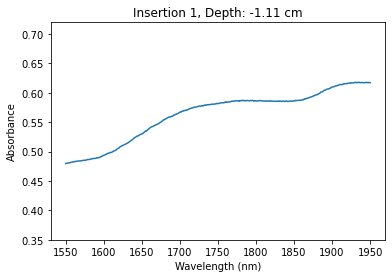

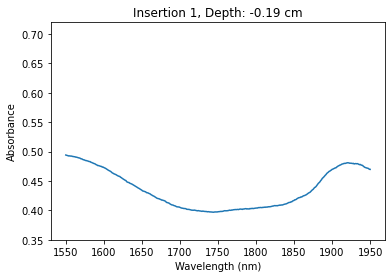

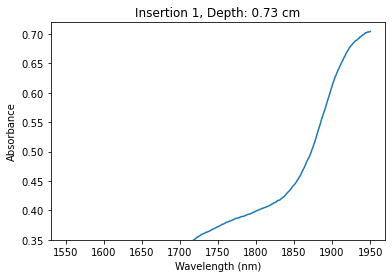

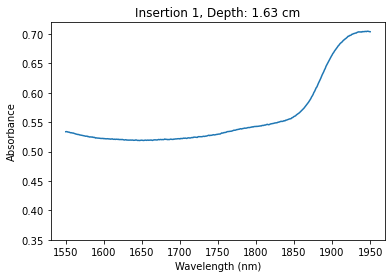

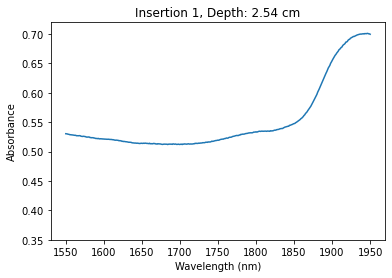

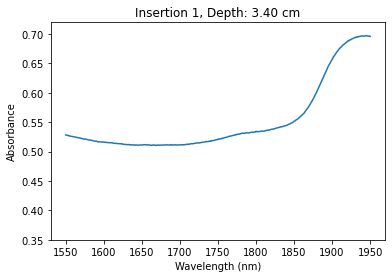

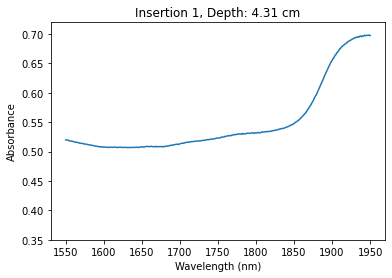

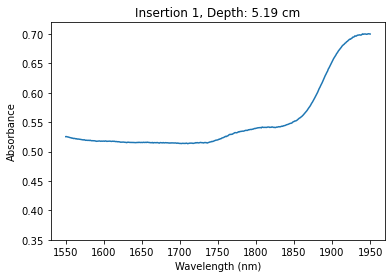

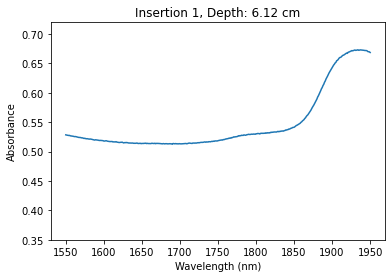

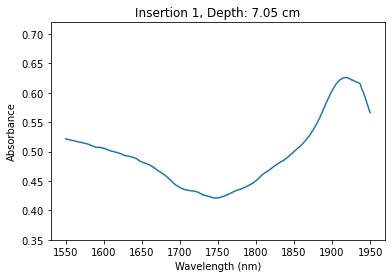

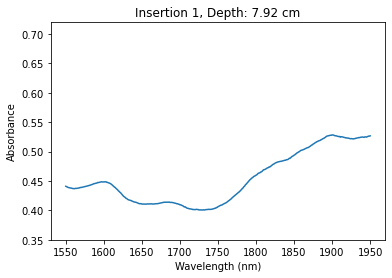

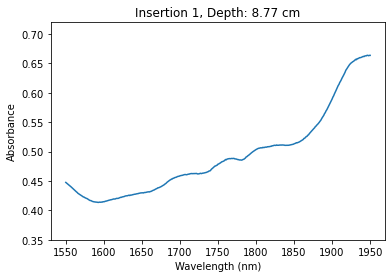

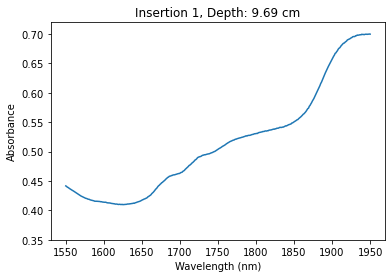

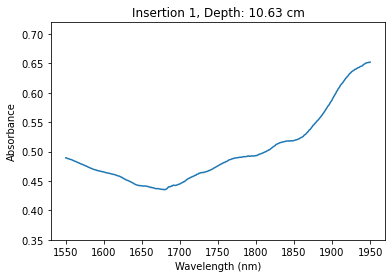

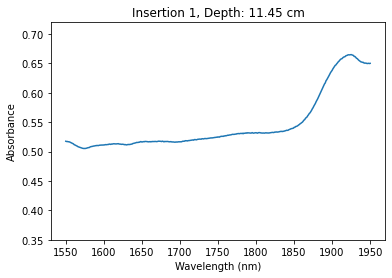

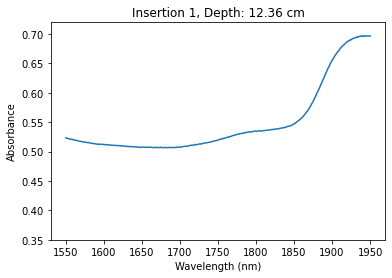

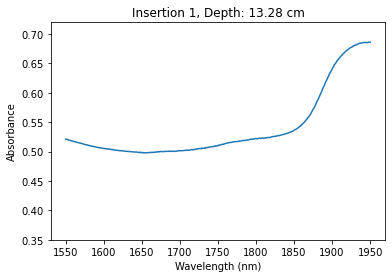

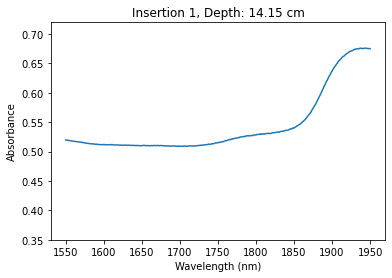

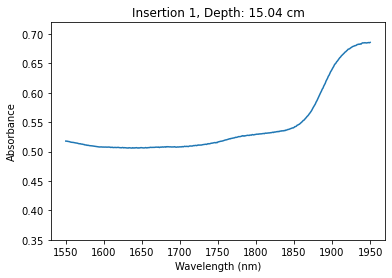

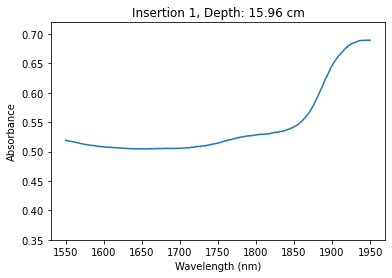

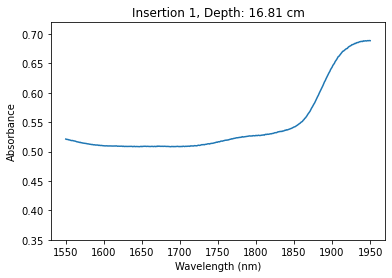

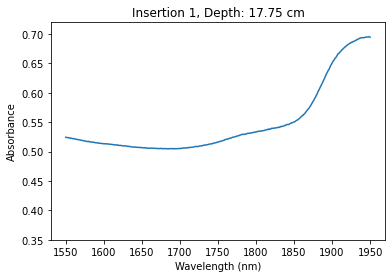

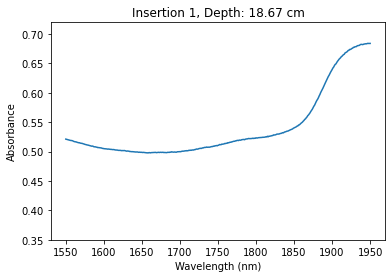

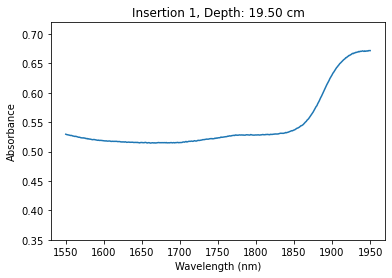

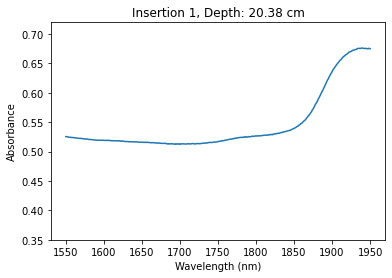

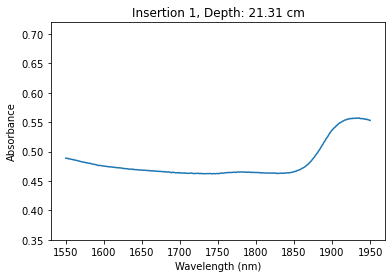

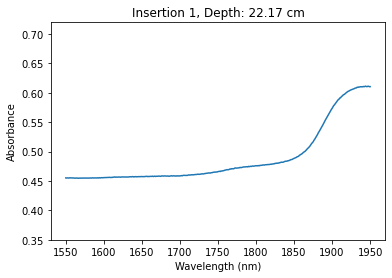

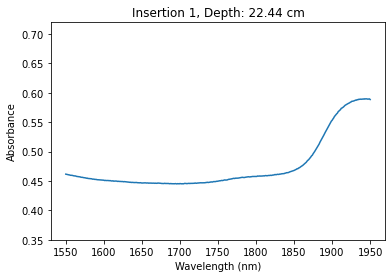

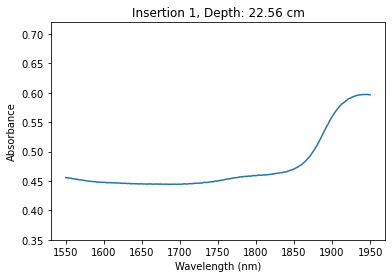

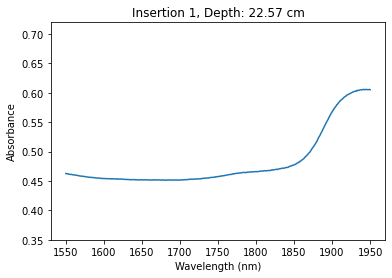

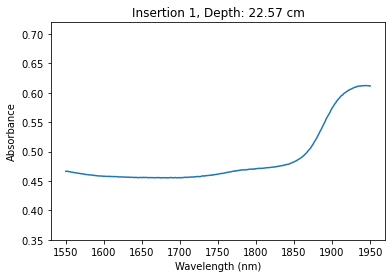

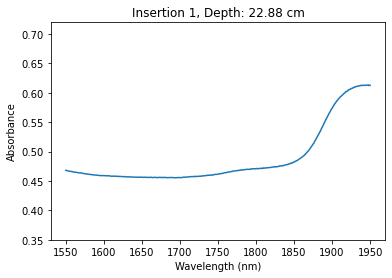

In [48]:
for spectrum in range(abs_depth_df.shape[0]):
    fig, ax = plt.subplots()
    ax.set_ylim(0.35, 0.72 )
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_title(f"Insertion 1, Depth: {abs_depth_df.iloc[spectrum, -1]:0.2f} cm")
    ax.plot(waves, abs_depth_df.iloc[spectrum, :-2])
    
    plt.show()

In [86]:
insertions = ['session001/cal001/ins001', 'session001/cal001/ins002', 'session001/cal001/ins003', 'session002/cal002/ins004',
             'session002/cal002/ins005', 'session002/cal002/ins006']
dfs = ['abs1', 'abs2', 'abs3', 'abs4', 'abs5', 'abs6']

In [87]:
absorb_str = 'derived/absorbance_depth'

for i in range(len(insertions)):
    dfs[i] = pd.DataFrame(data = h5_file[f'{insertions[i]}/{absorb_str}'][:], columns=cols)
    
    
    
    

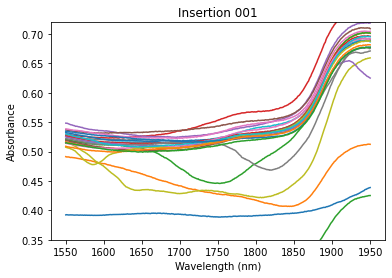

In [94]:
fig, ax = plt.subplots()
ax.set_ylim(0.35, 0.72)
ax.set_ylabel("Absorbance")
ax.set_xlabel("Wavelength (nm)")
ax.set_title("Insertion 001")
for spectrum in range(dfs[0].shape[0]):
    ax.plot(waves, dfs[0].iloc[spectrum, :-2])
plt.show()    

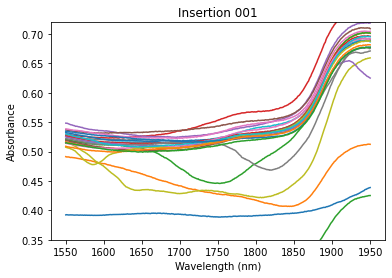

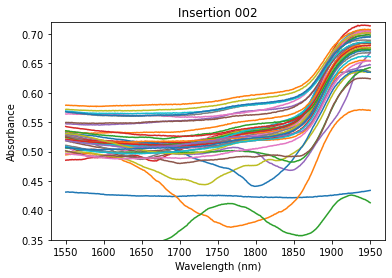

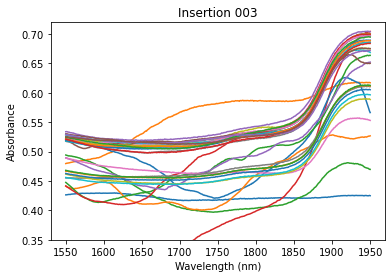

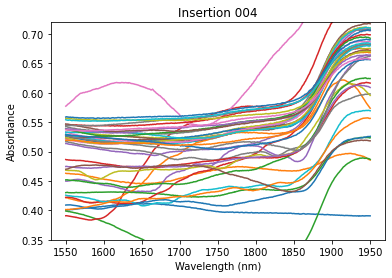

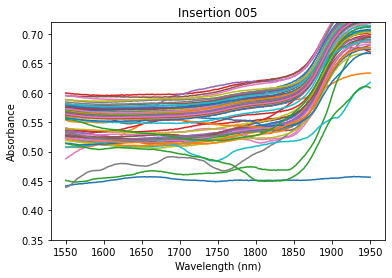

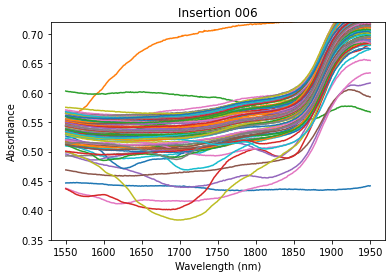

In [96]:
for i in range(len(dfs)):
    fig, ax = plt.subplots()
    ax.set_ylim(0.35, 0.72)
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_title(f"Insertion {(i + 1):03d}")
    for spectrum in range(dfs[i].shape[0]):
        ax.plot(waves, dfs[i].iloc[spectrum, :-2])
    plt.show()

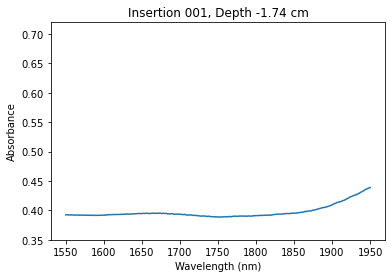

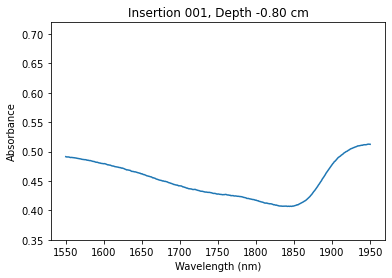

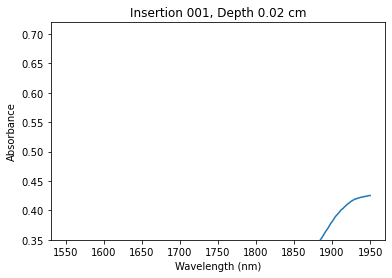

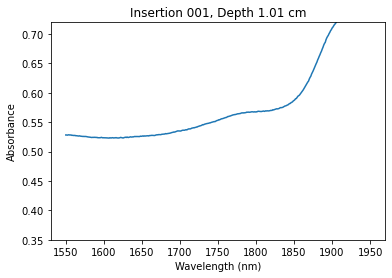

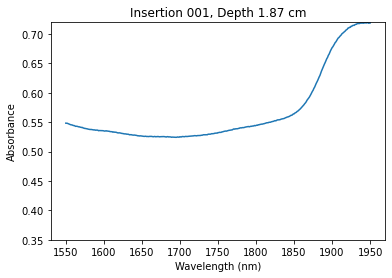

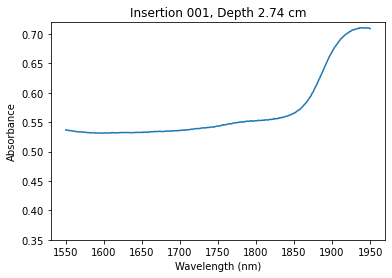

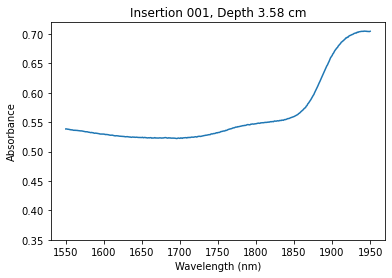

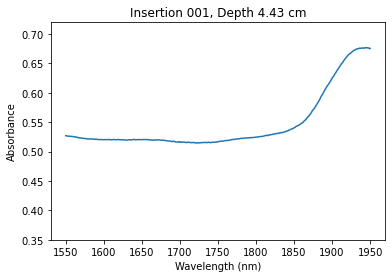

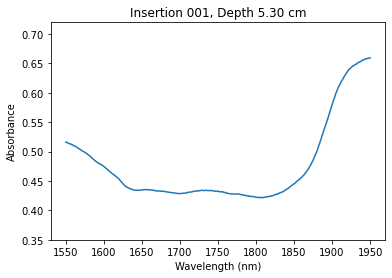

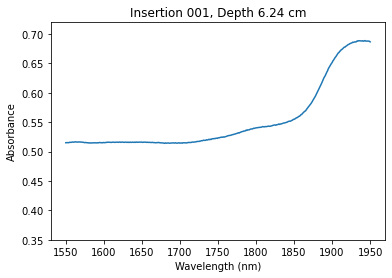

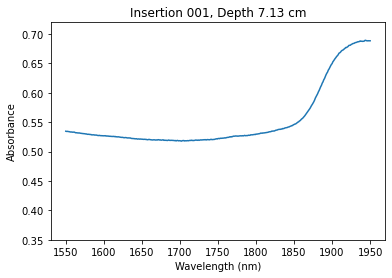

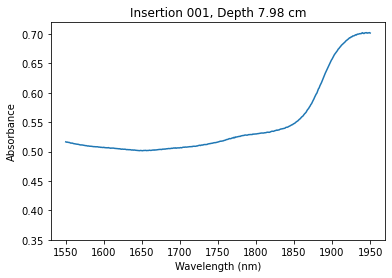

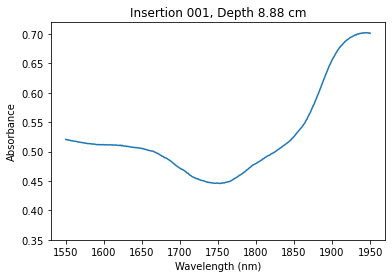

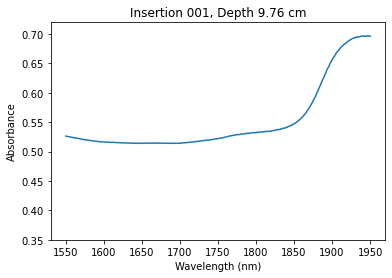

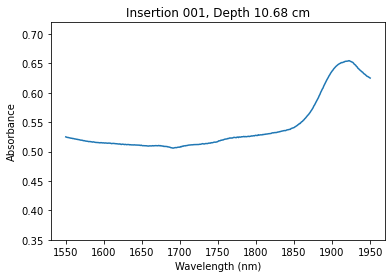

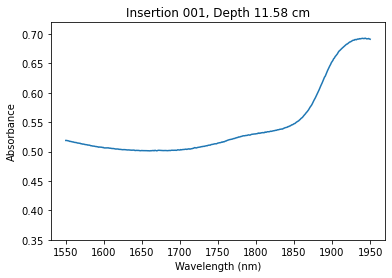

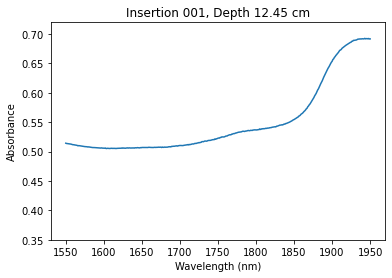

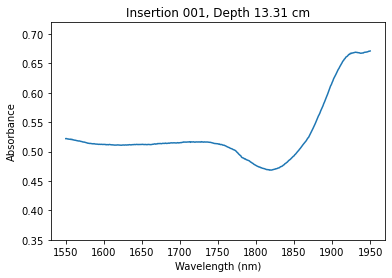

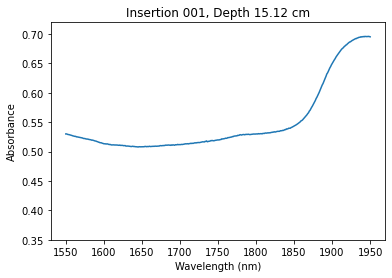

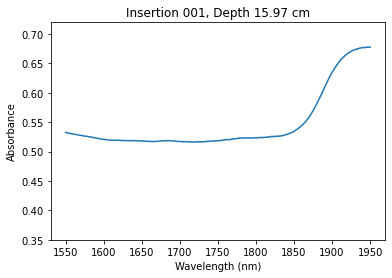

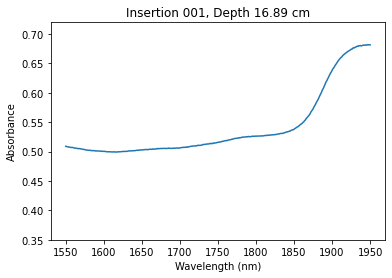

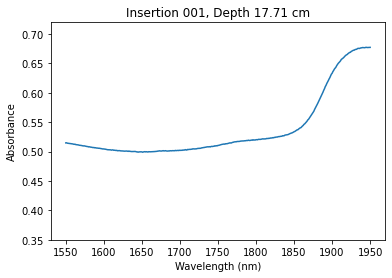

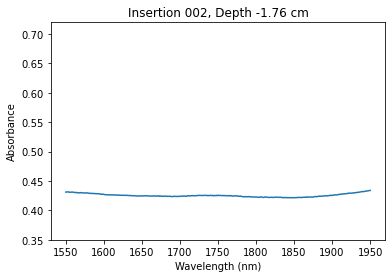

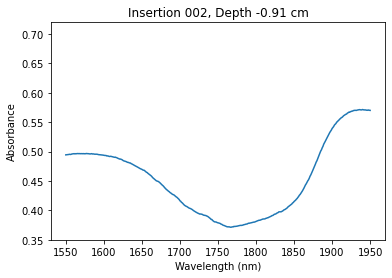

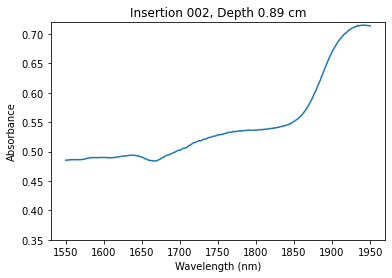

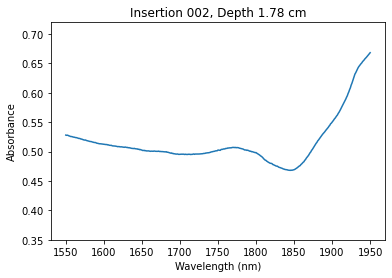

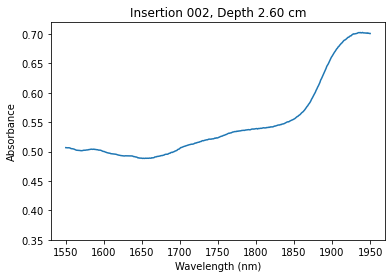

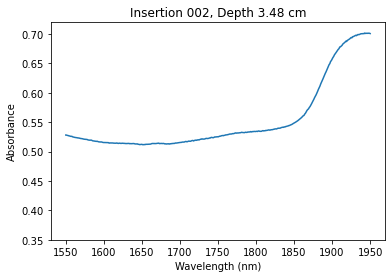

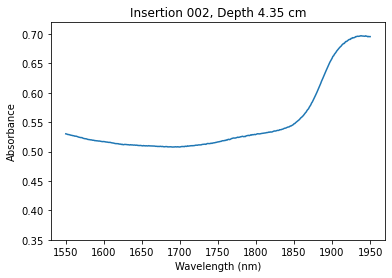

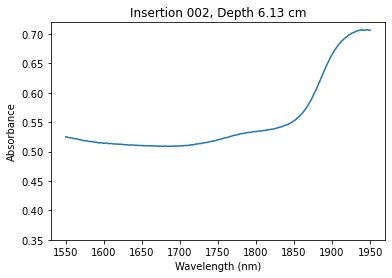

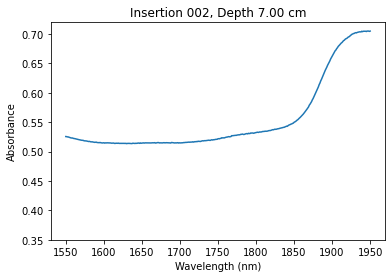

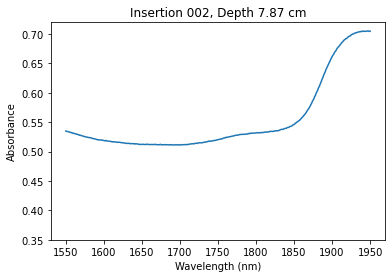

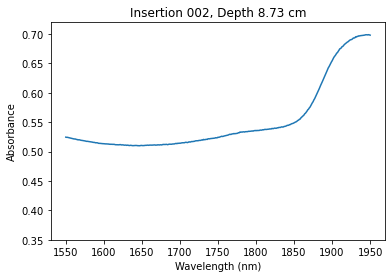

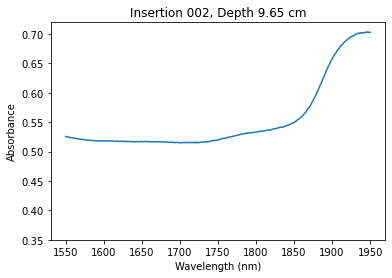

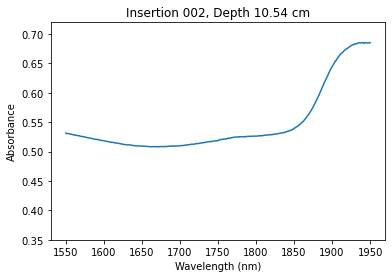

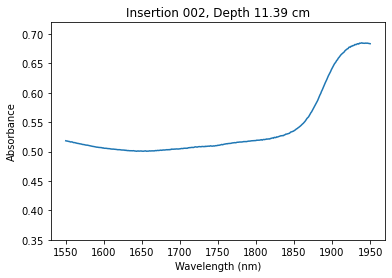

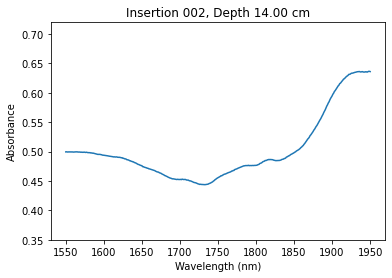

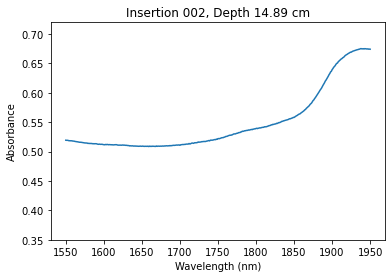

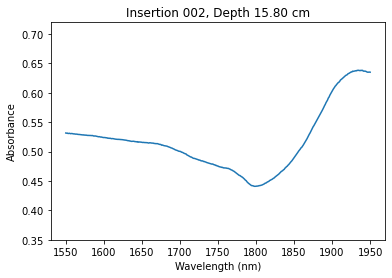

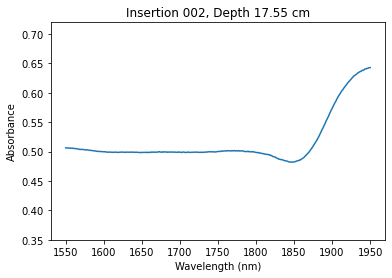

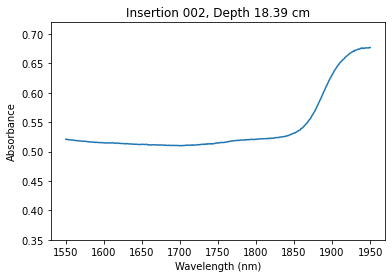

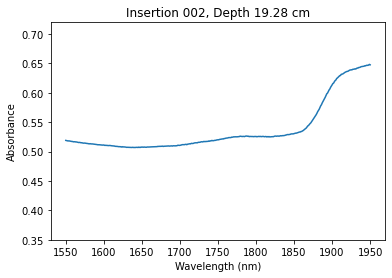

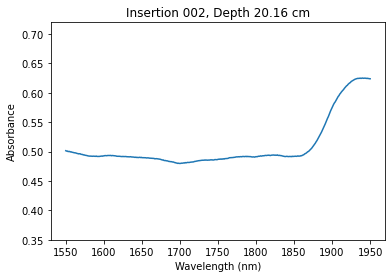

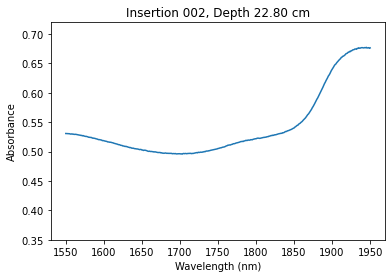

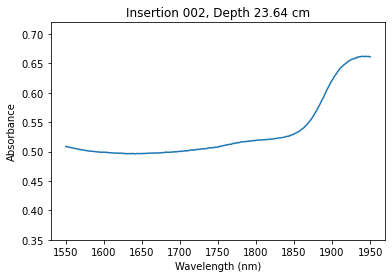

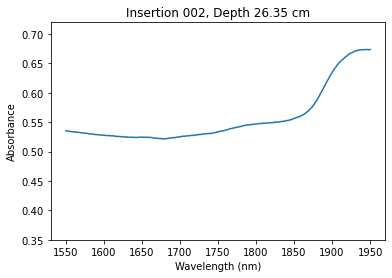

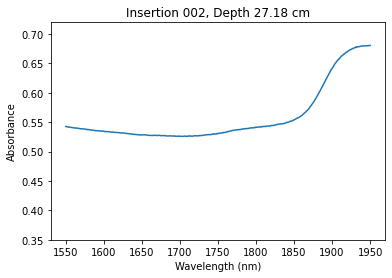

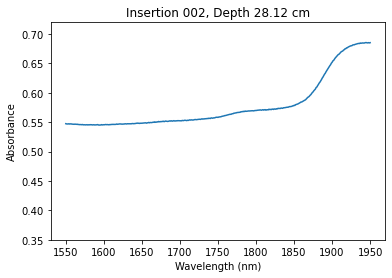

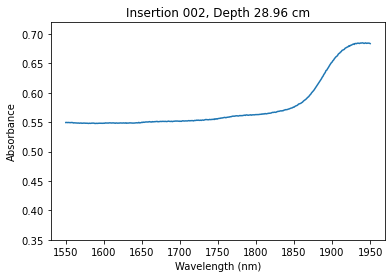

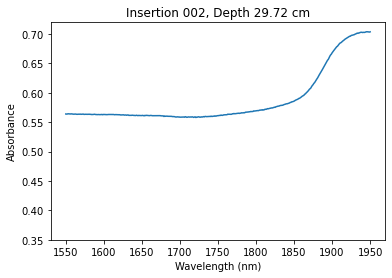

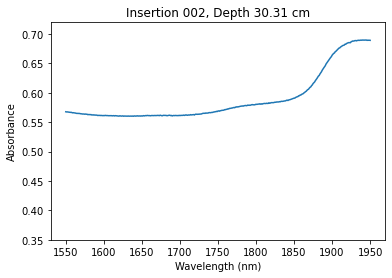

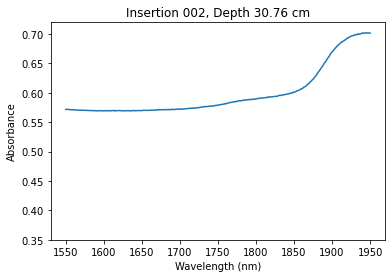

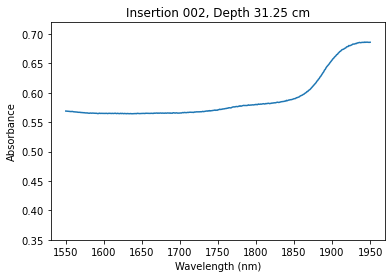

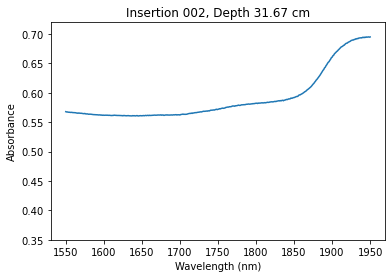

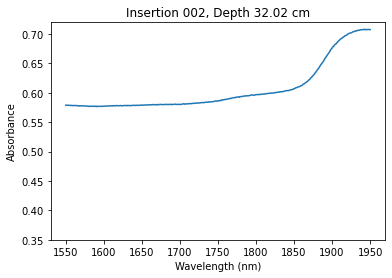

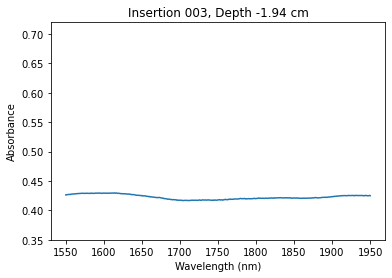

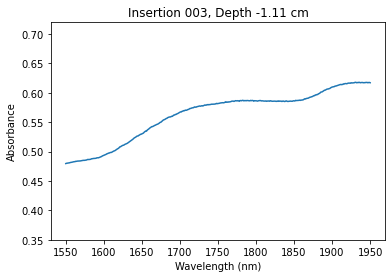

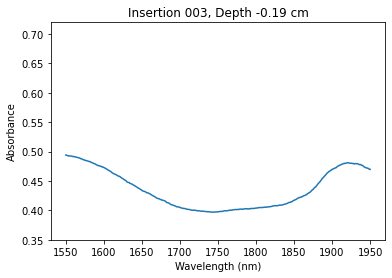

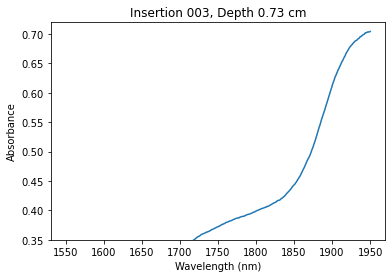

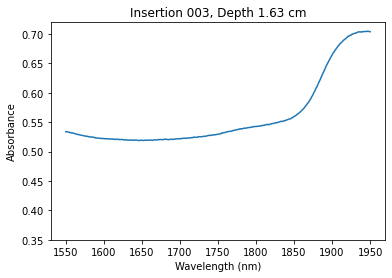

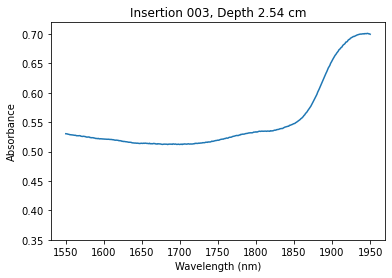

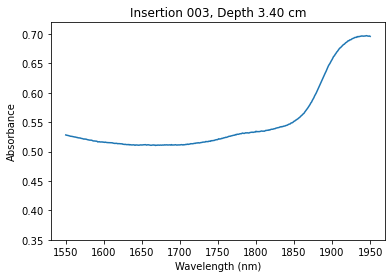

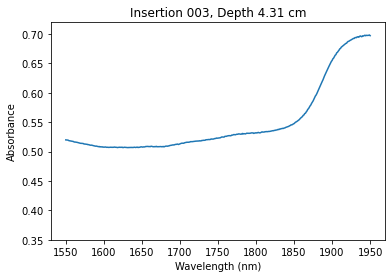

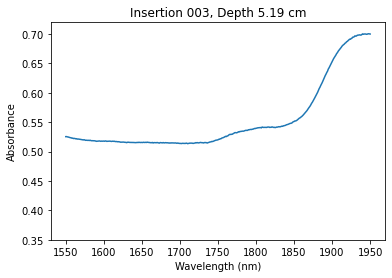

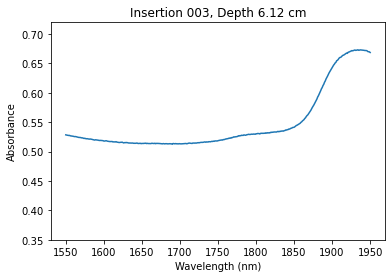

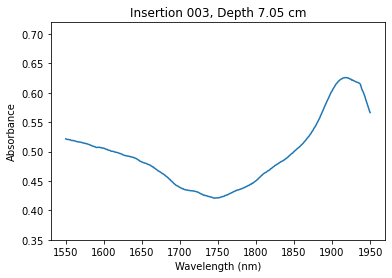

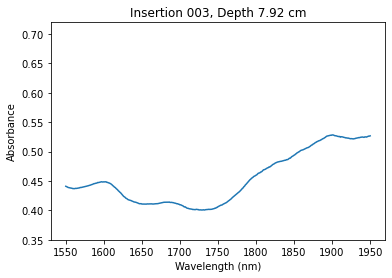

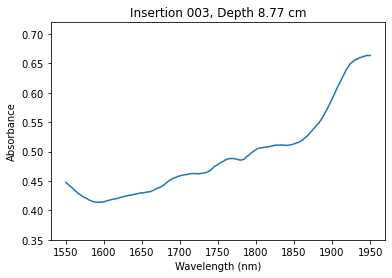

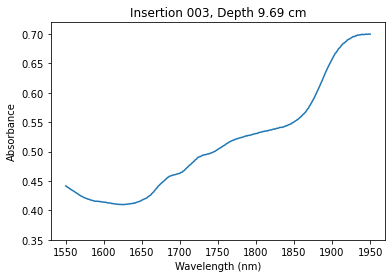

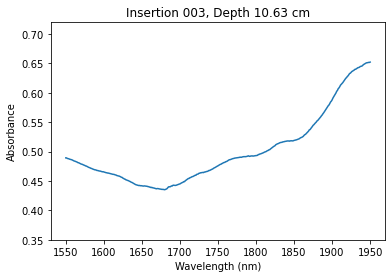

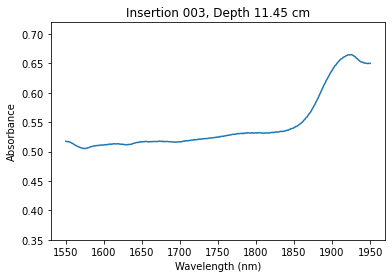

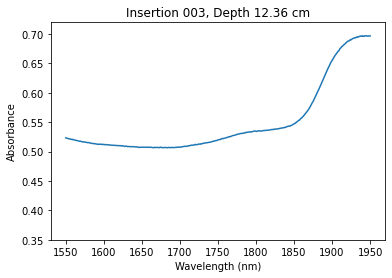

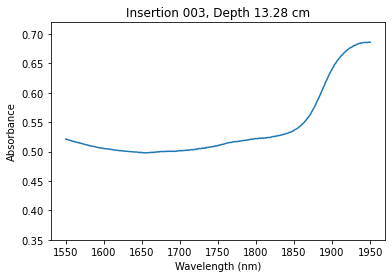

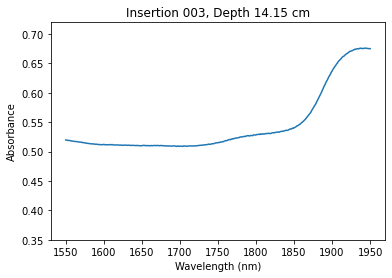

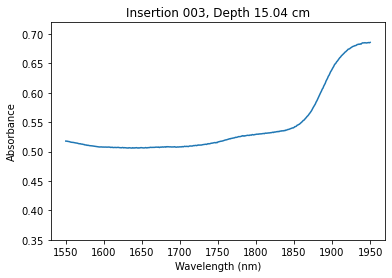

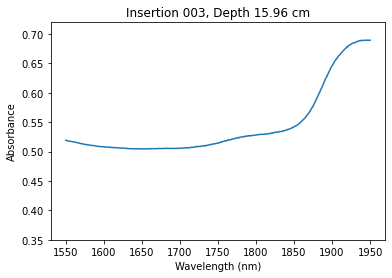

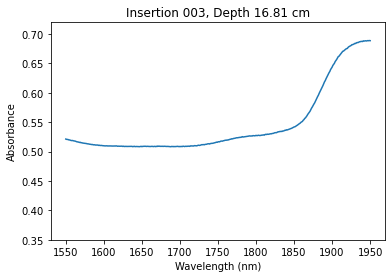

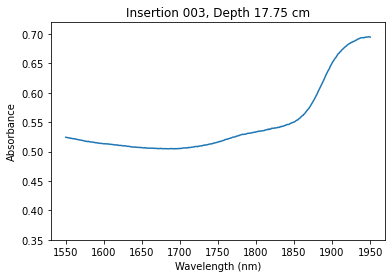

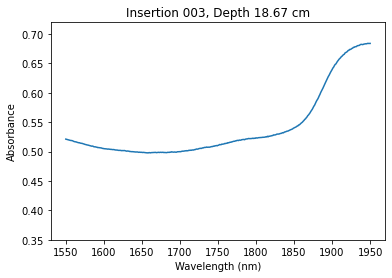

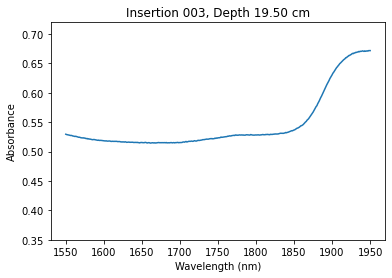

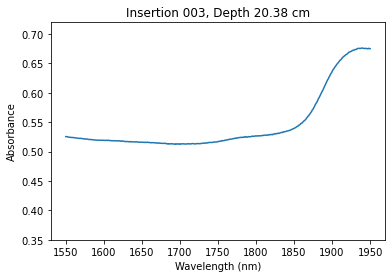

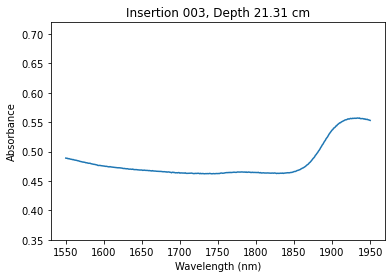

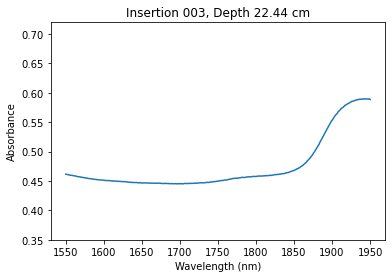

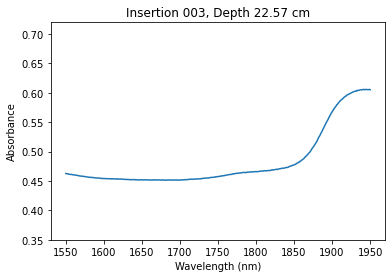

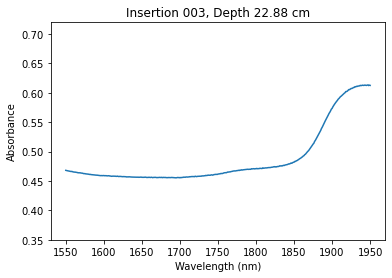

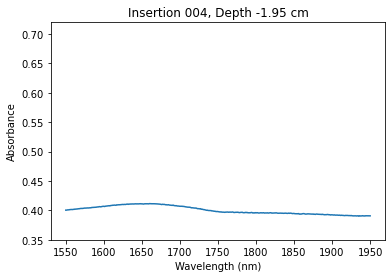

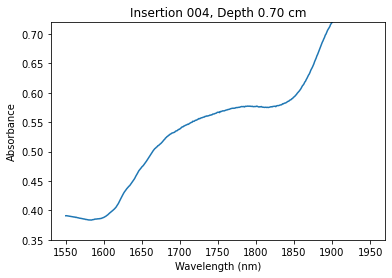

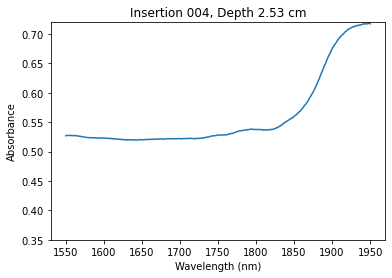

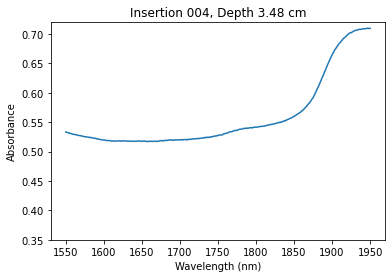

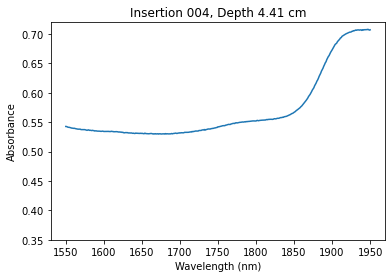

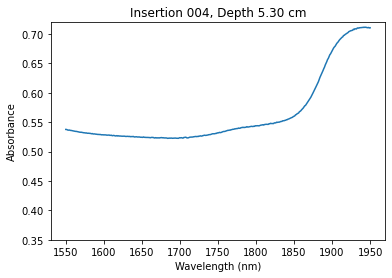

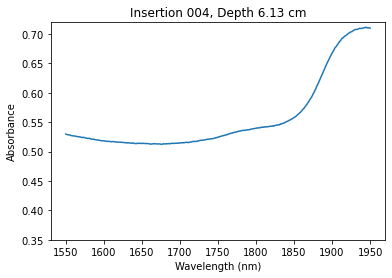

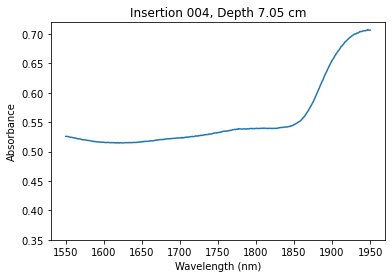

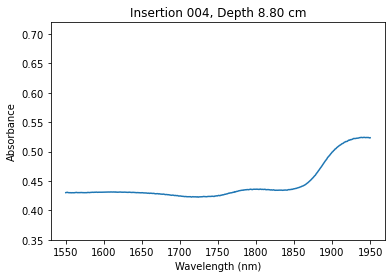

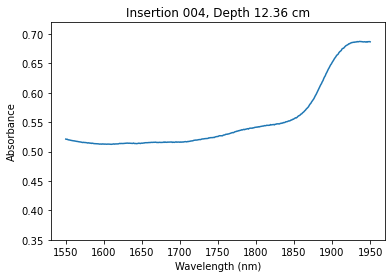

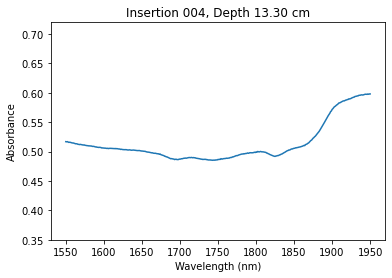

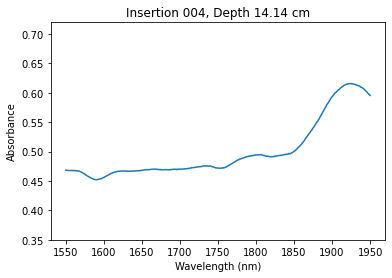

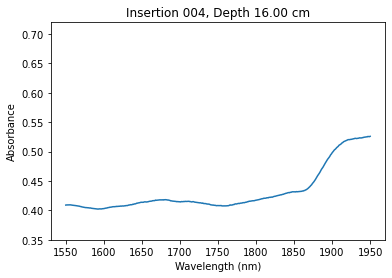

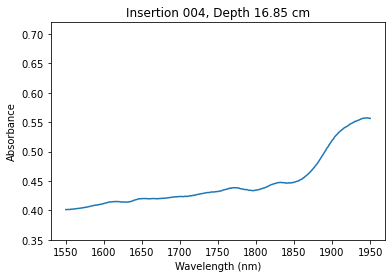

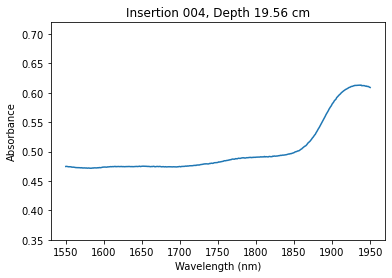

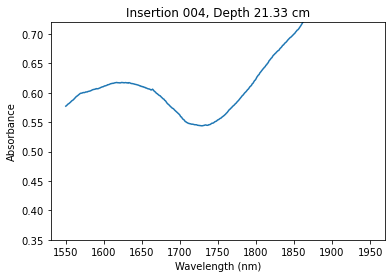

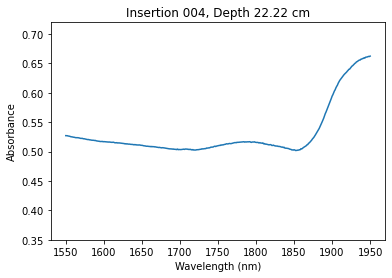

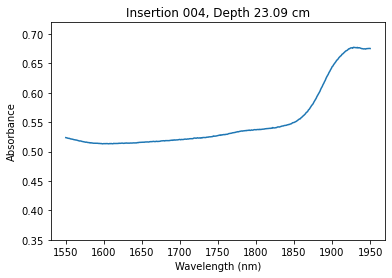

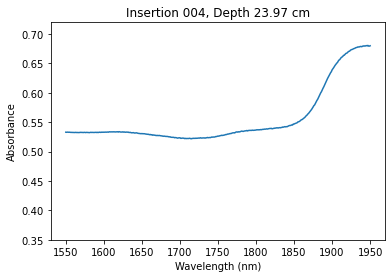

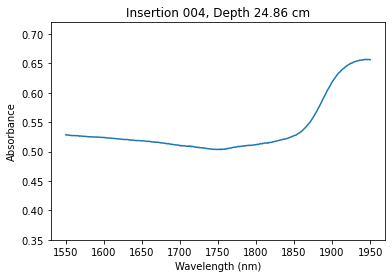

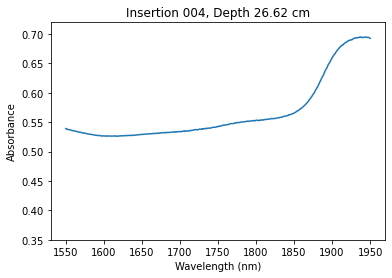

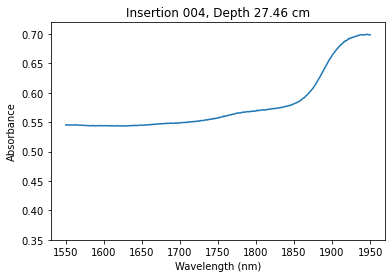

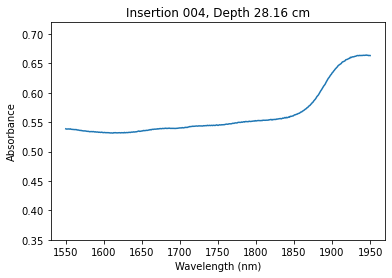

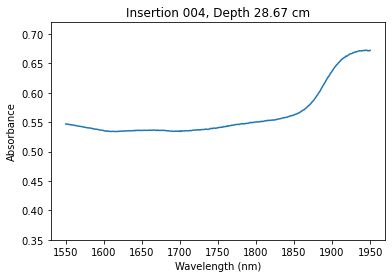

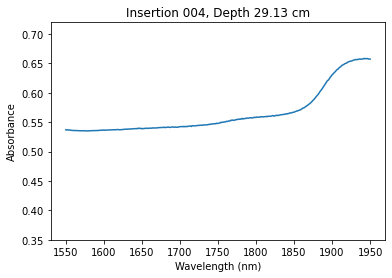

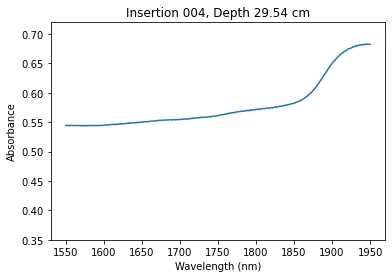

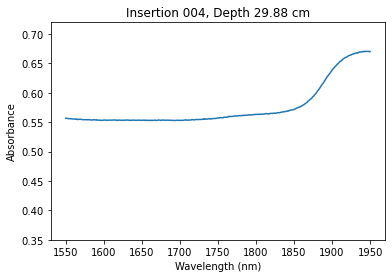

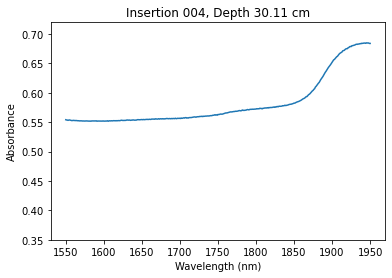

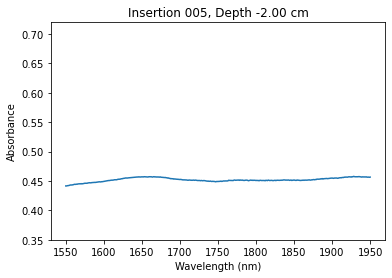

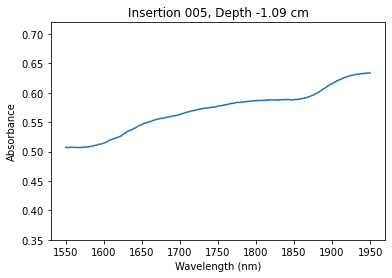

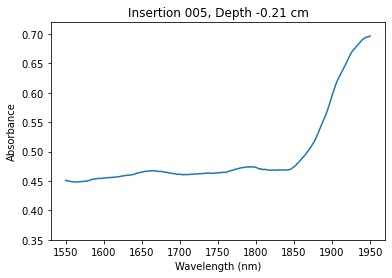

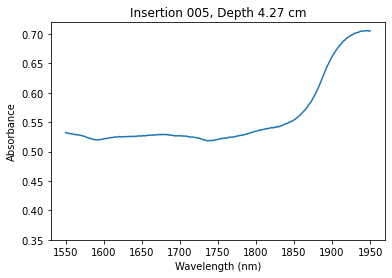

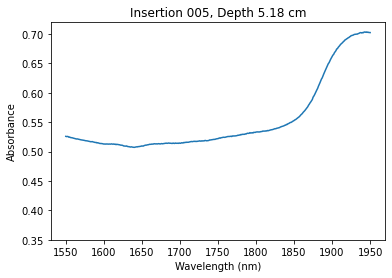

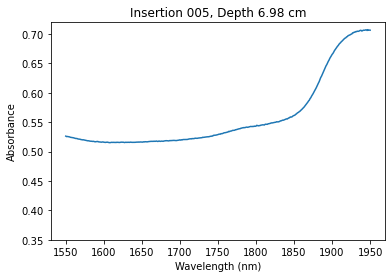

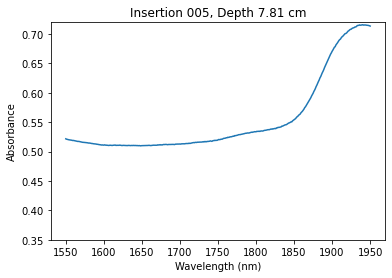

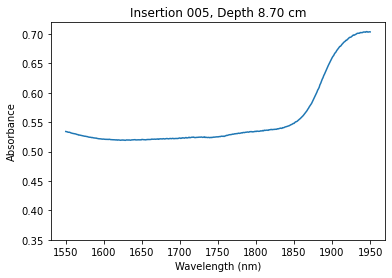

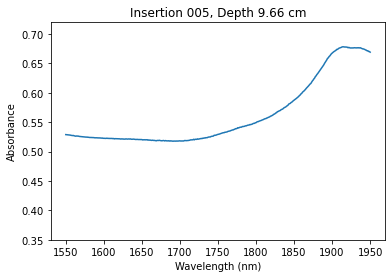

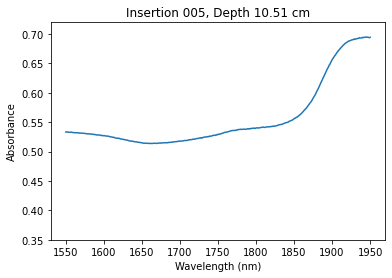

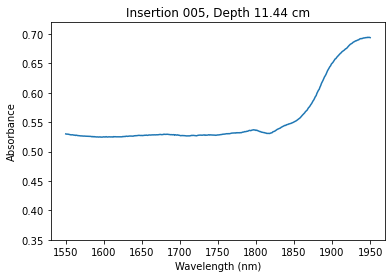

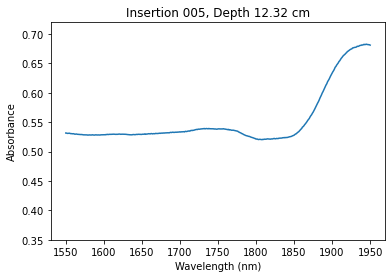

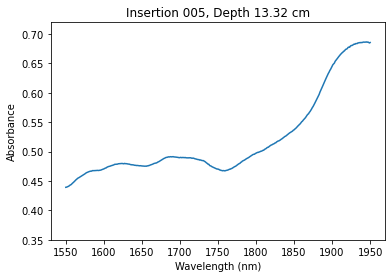

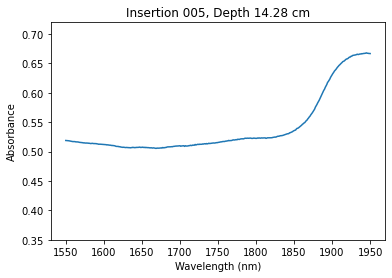

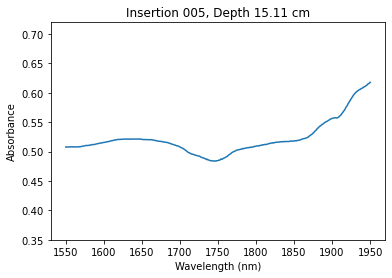

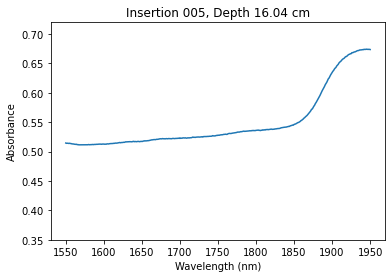

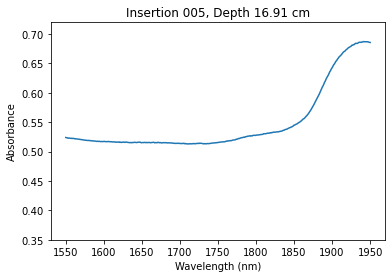

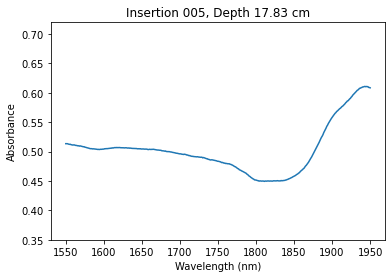

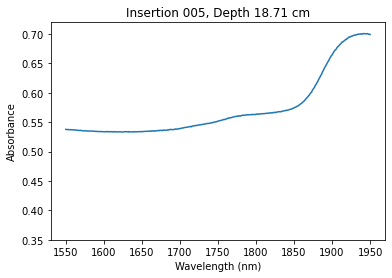

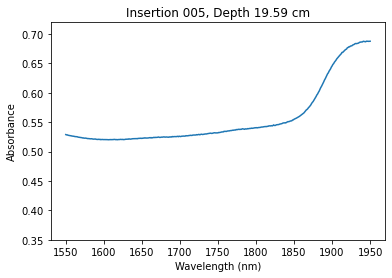

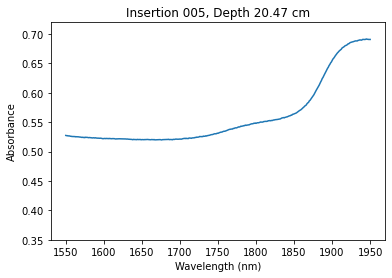

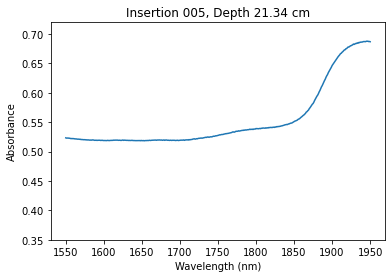

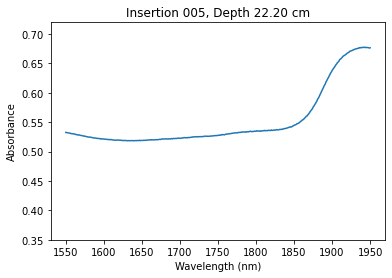

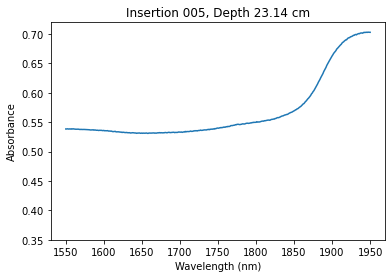

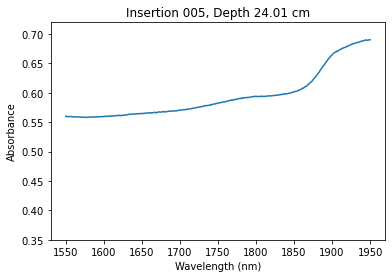

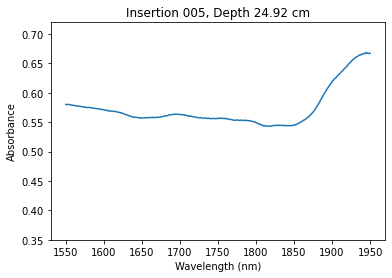

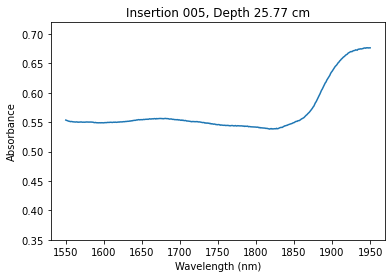

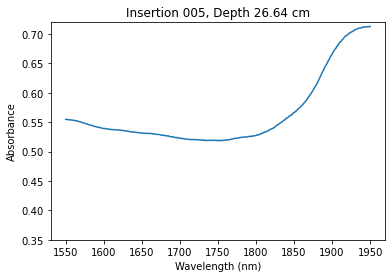

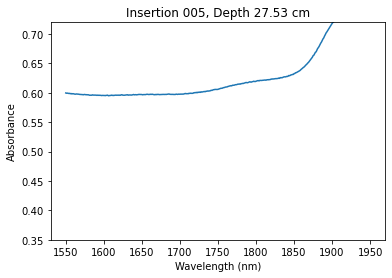

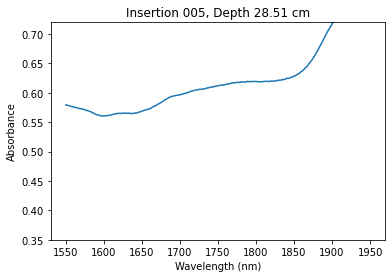

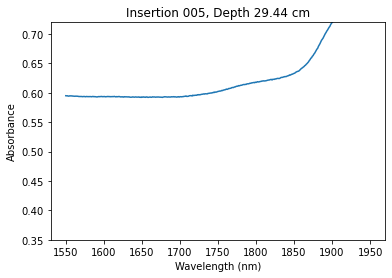

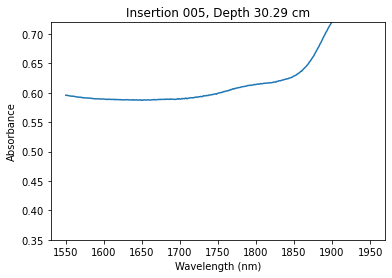

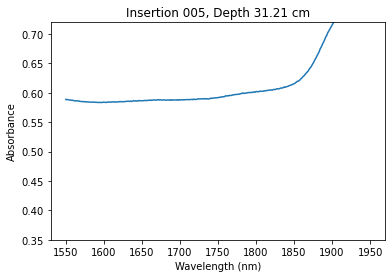

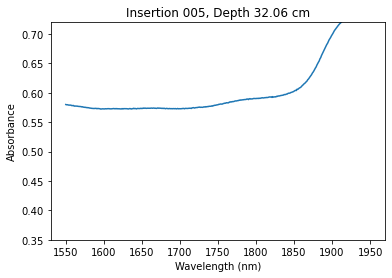

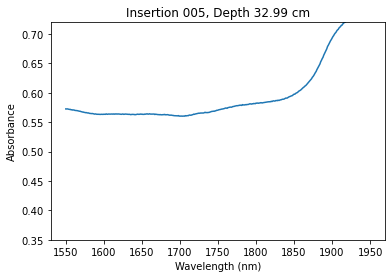

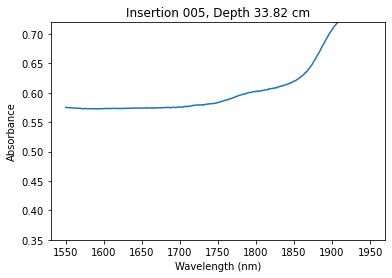

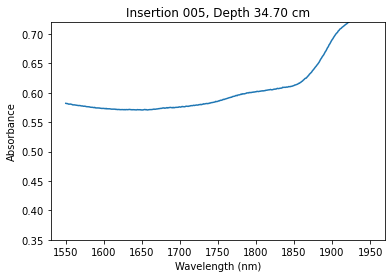

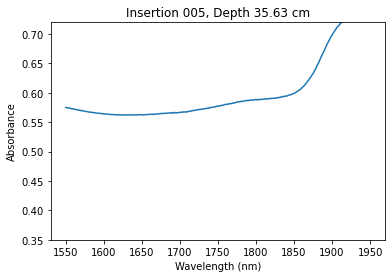

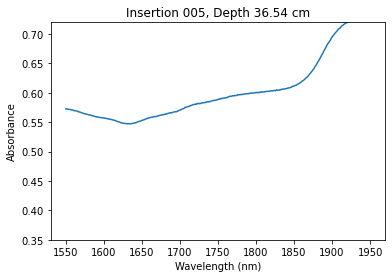

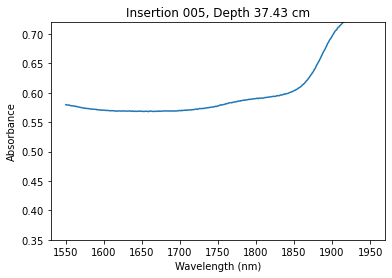

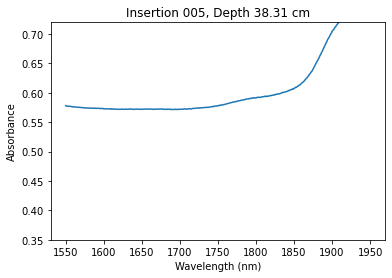

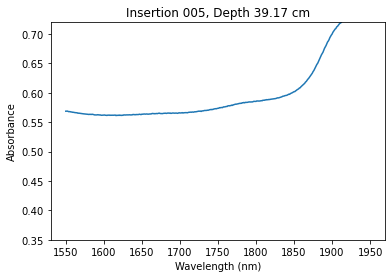

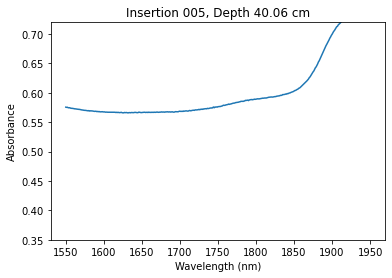

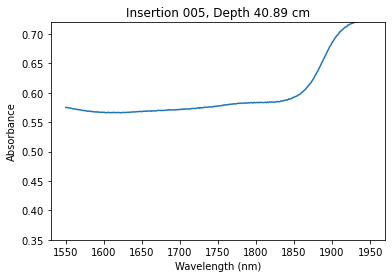

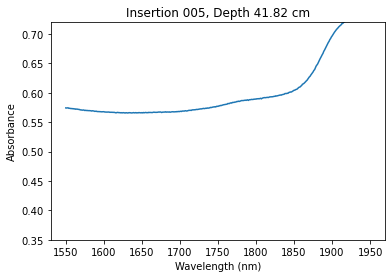

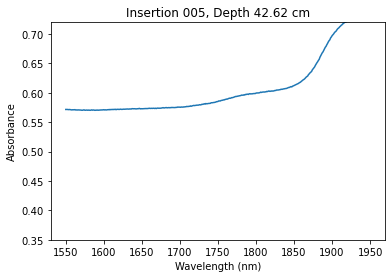

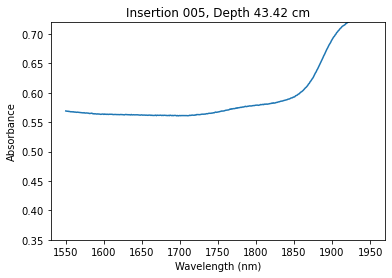

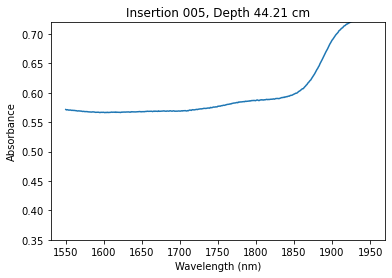

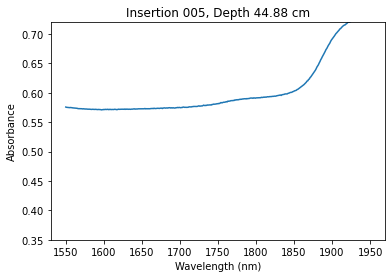

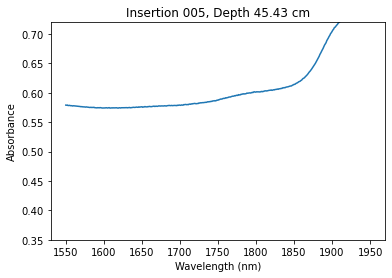

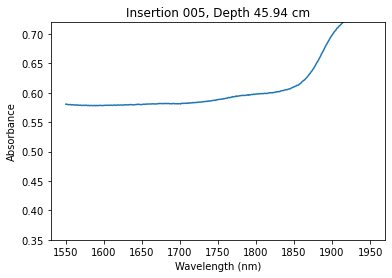

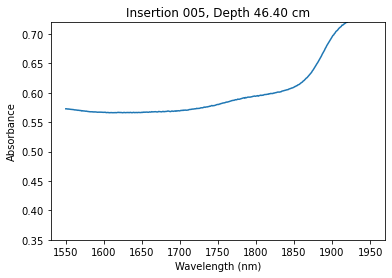

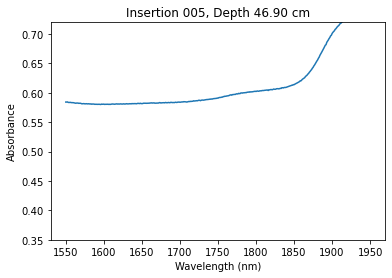

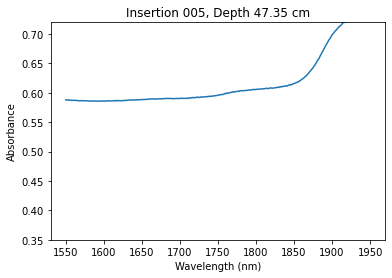

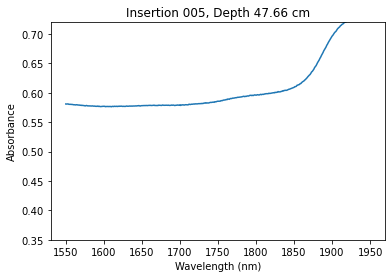

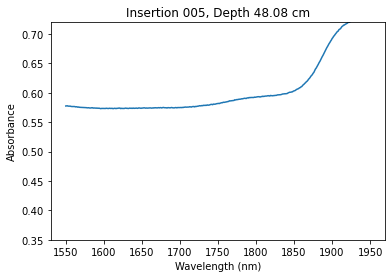

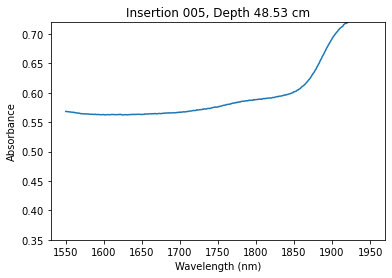

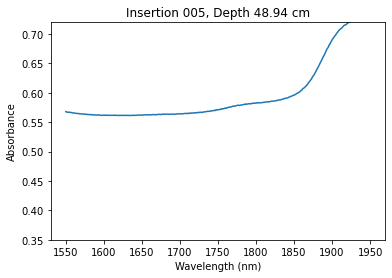

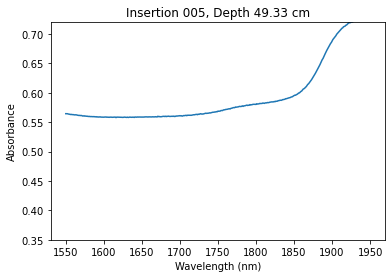

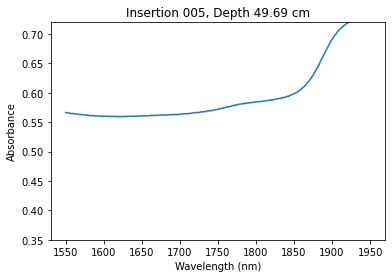

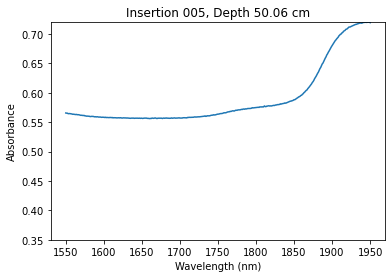

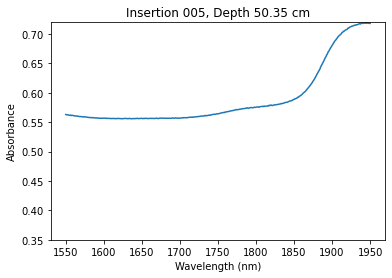

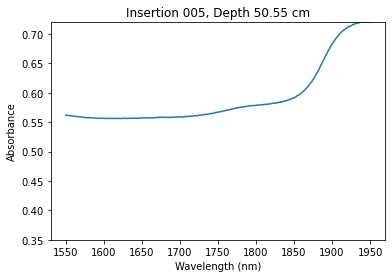

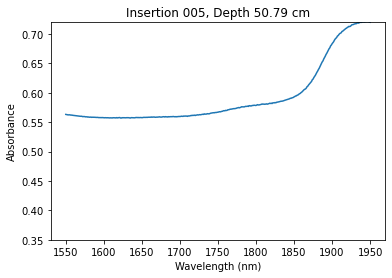

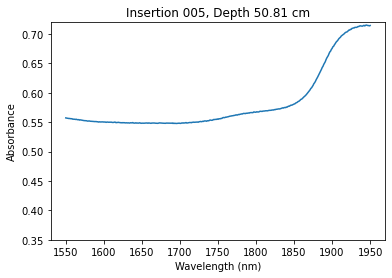

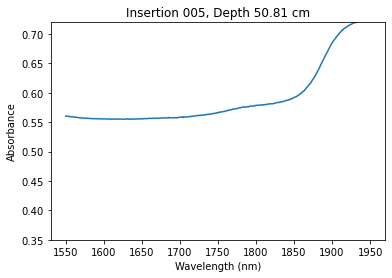

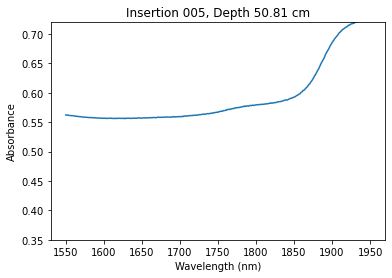

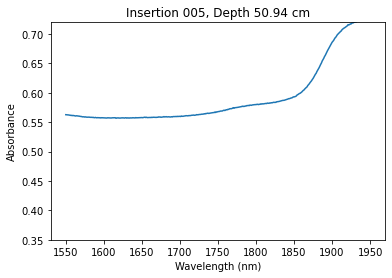

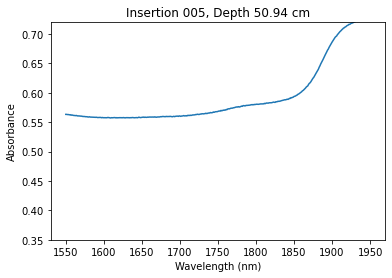

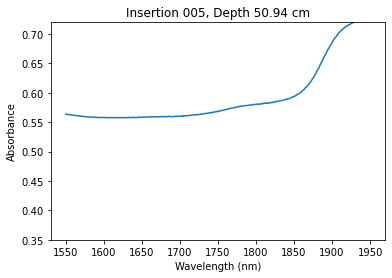

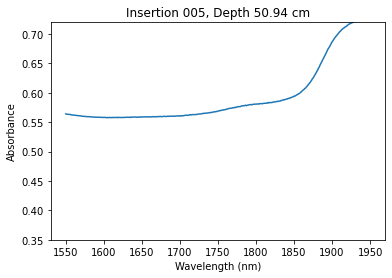

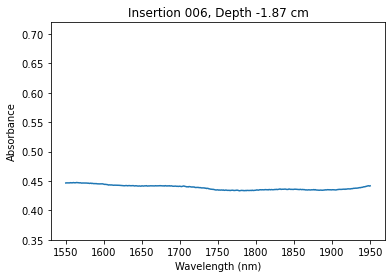

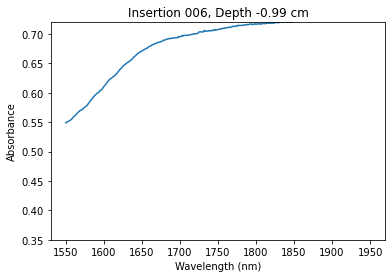

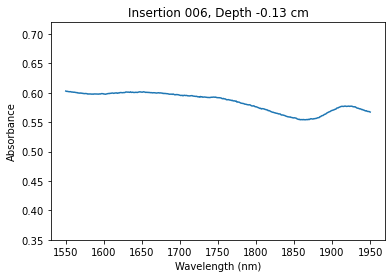

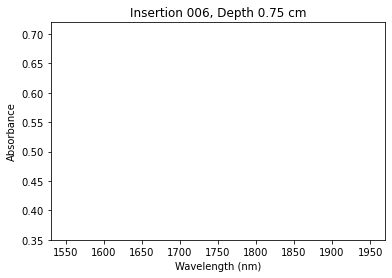

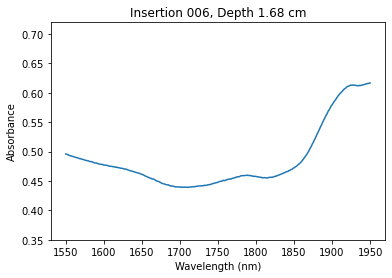

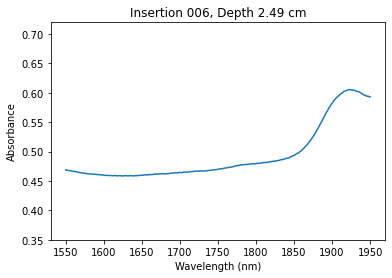

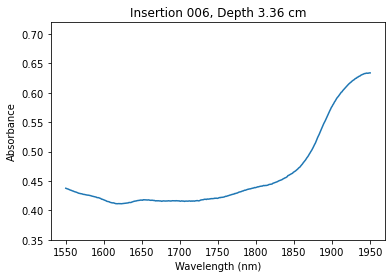

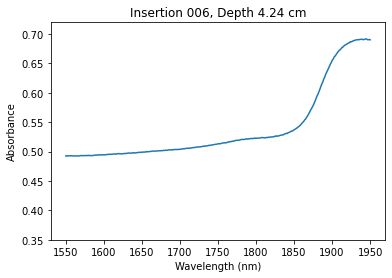

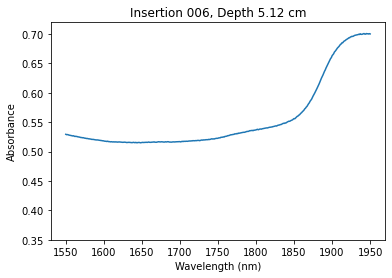

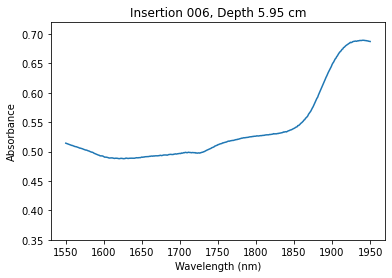

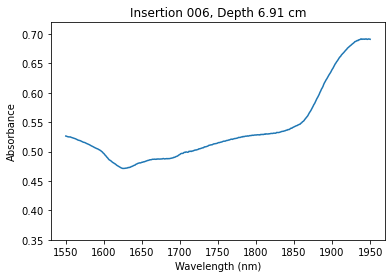

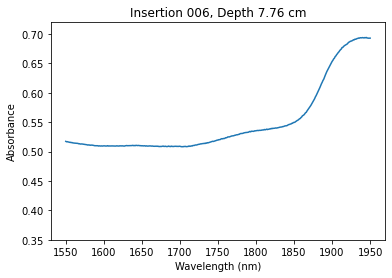

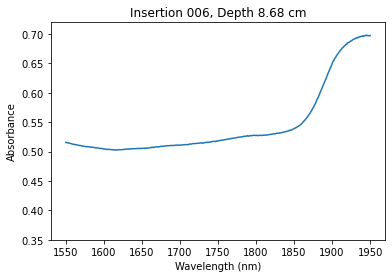

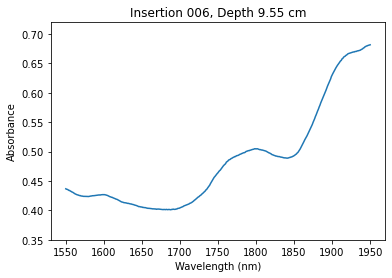

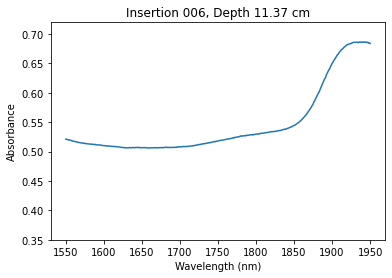

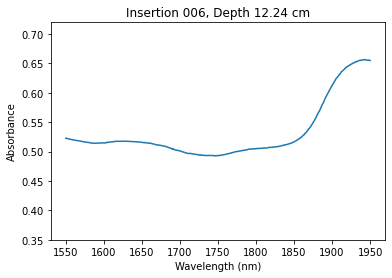

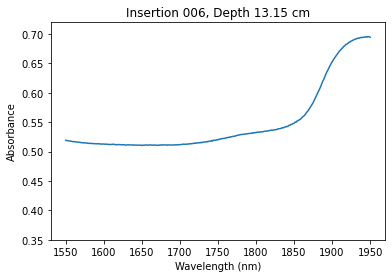

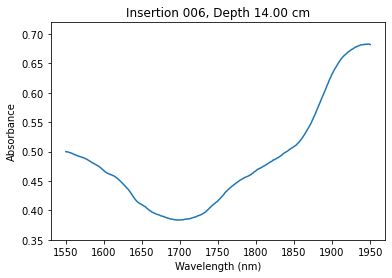

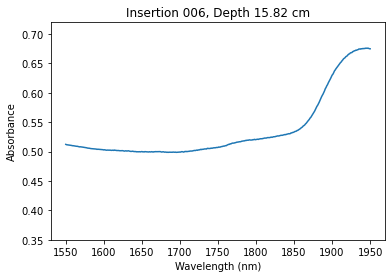

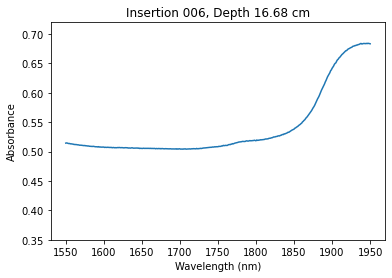

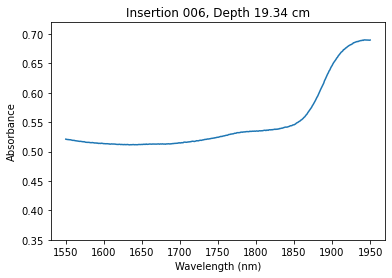

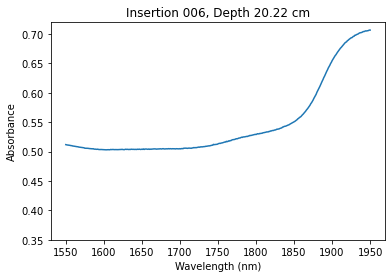

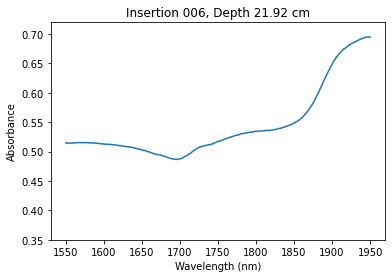

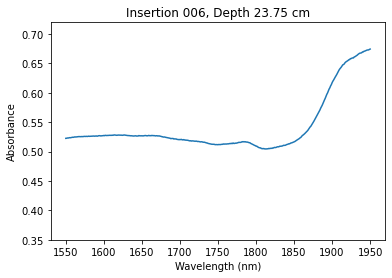

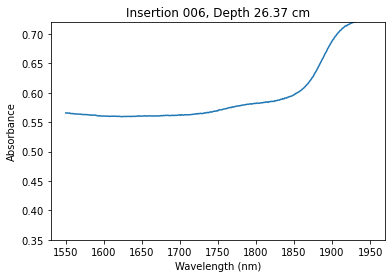

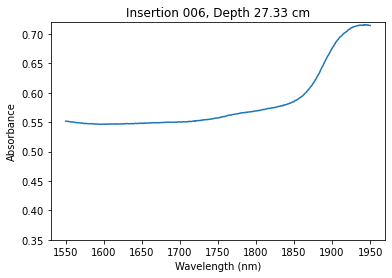

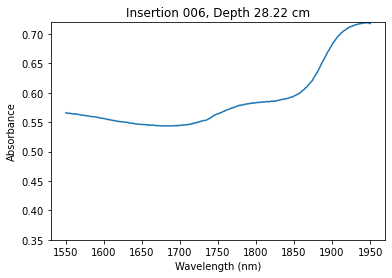

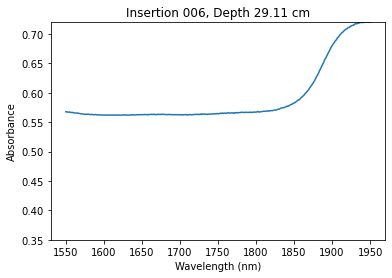

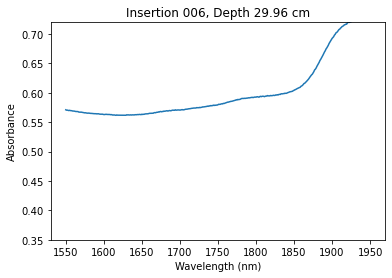

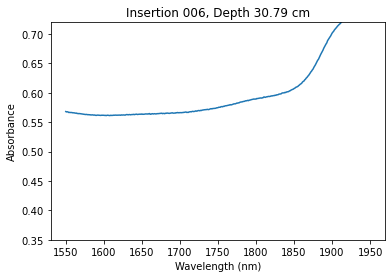

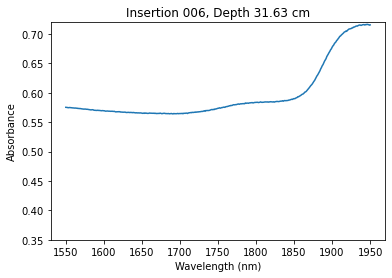

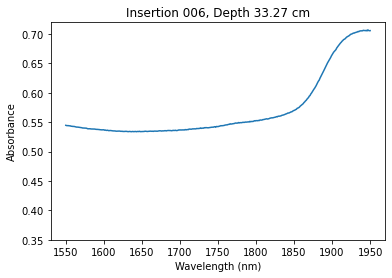

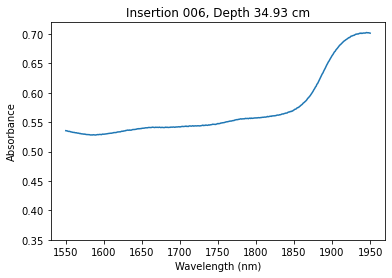

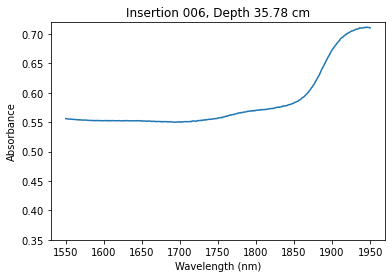

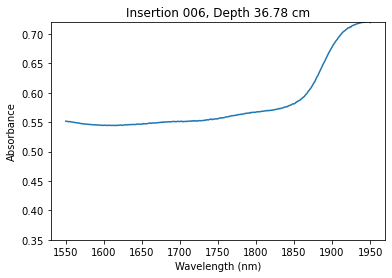

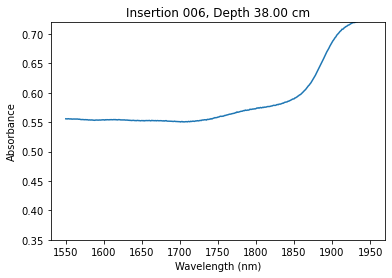

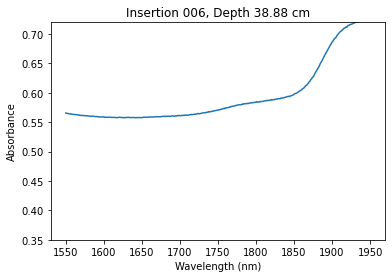

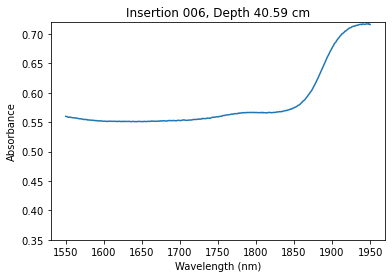

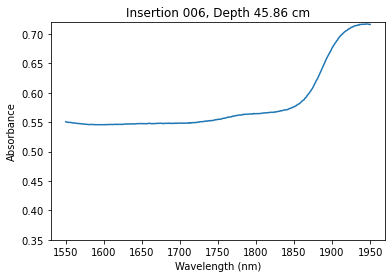

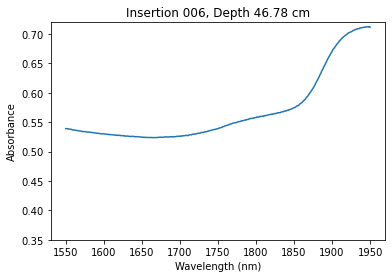

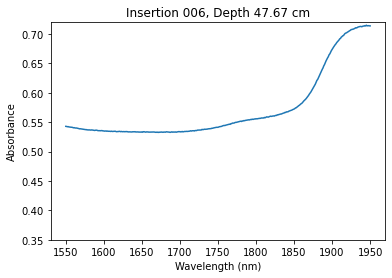

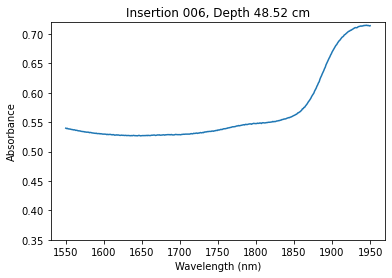

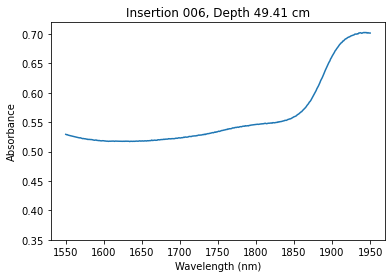

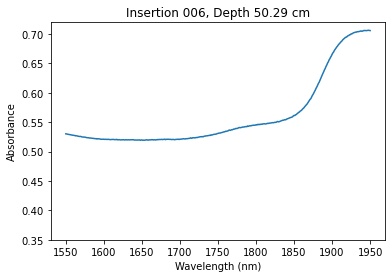

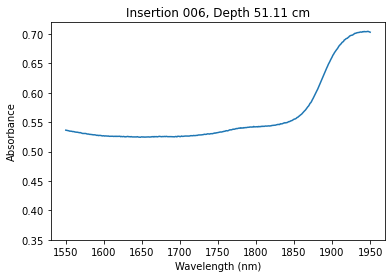

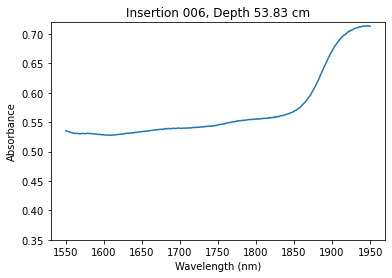

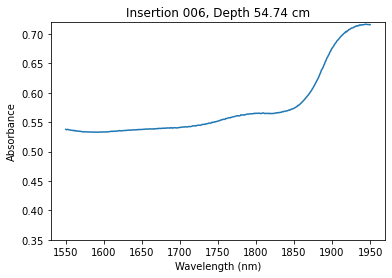

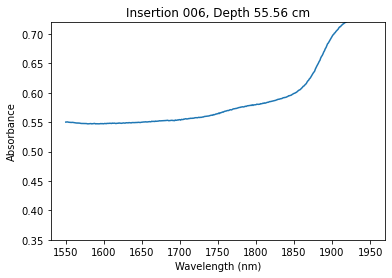

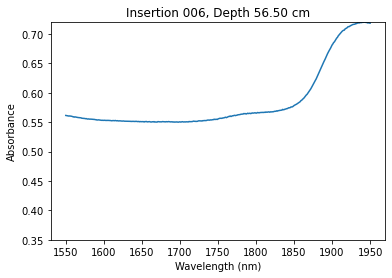

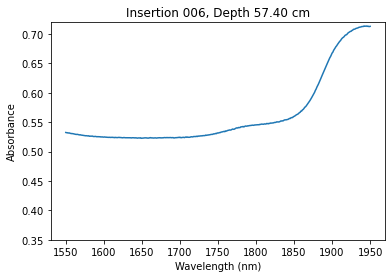

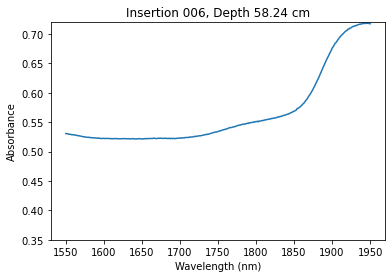

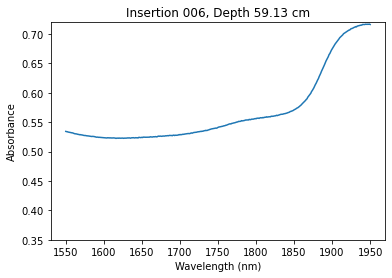

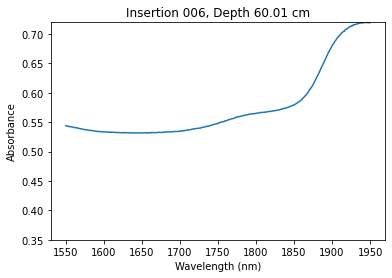

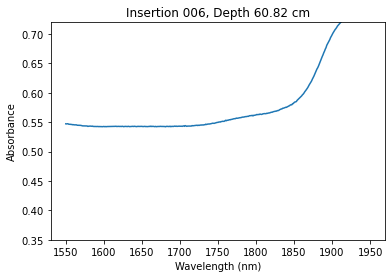

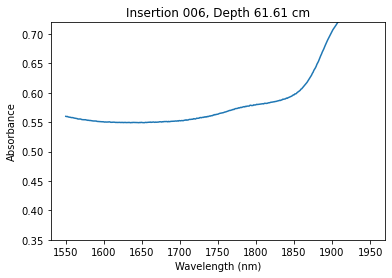

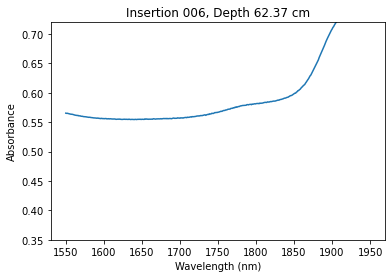

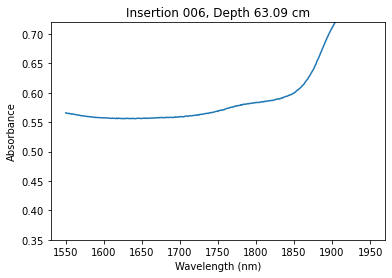

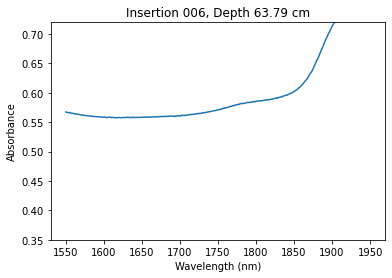

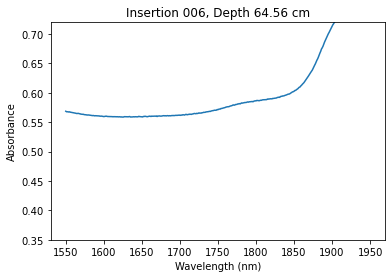

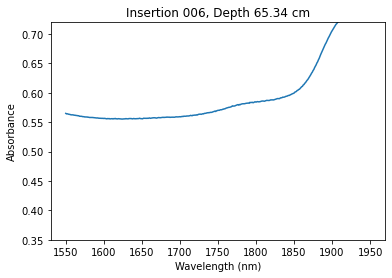

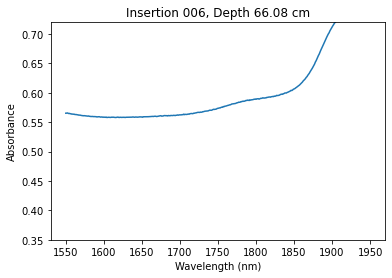

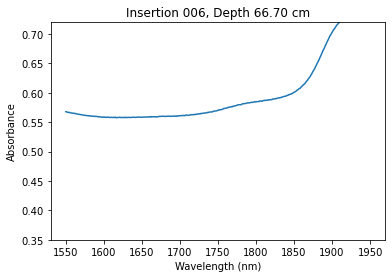

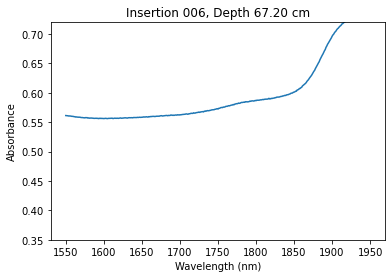

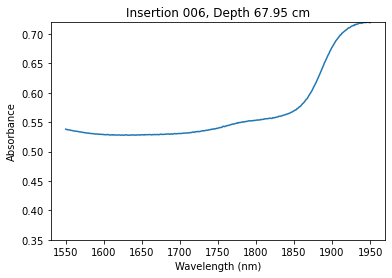

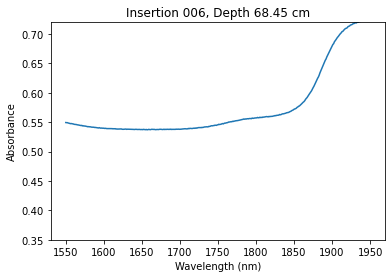

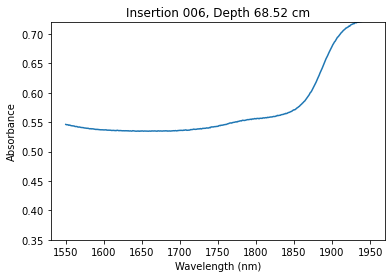

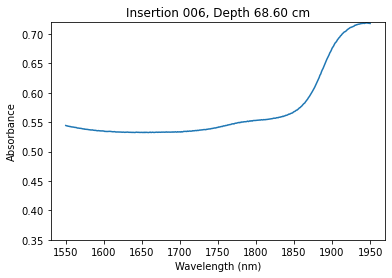

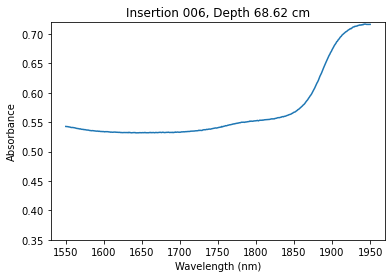

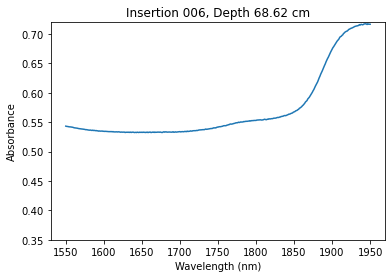

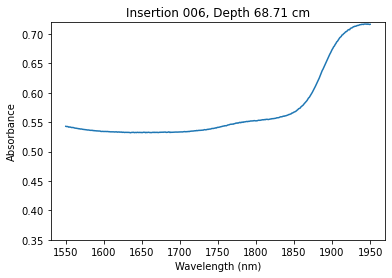

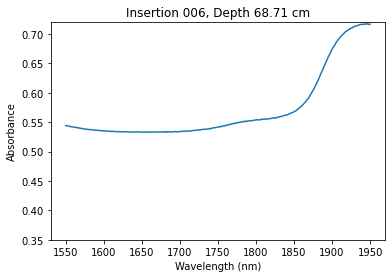

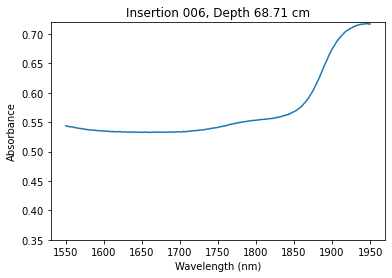

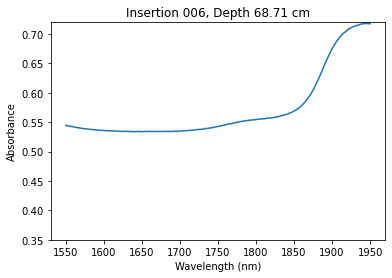

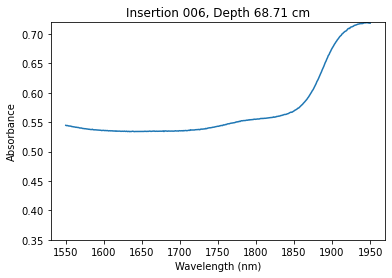

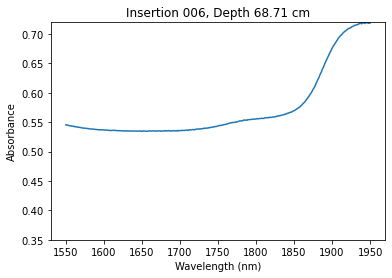

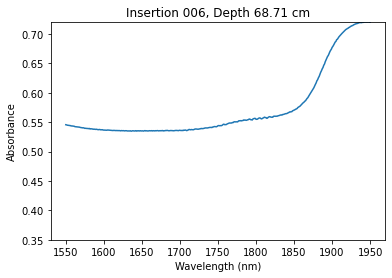

In [102]:
for i in range(len(dfs)):  
    for spectrum in range(dfs[i].shape[0]):
        fig, ax = plt.subplots()
        ax.set_ylim(0.35, 0.72)
        ax.set_ylabel("Absorbance")
        ax.set_xlabel("Wavelength (nm)")
        ax.set_title(f"Insertion {(i + 1):03d}, Depth {dfs[i].iloc[spectrum, -1]:0.2f} cm")
        ax.plot(waves, dfs[i].iloc[spectrum, :-2])
        plt.show()

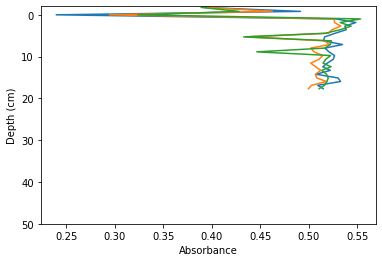

In [107]:
fig, ax = plt.subplots()
ax.set_ylim(50.0, -2.0)
ax.set_ylabel("Depth (cm)")
ax.set_xlabel("Absorbance")
abs1550 = dfs[0].loc[:, 1550.0]
abs1650 = dfs[0].loc[:, 1650.0]
abs1750 = dfs[0].loc[:, 1750.0]
depth = dfs[0].loc[:, "depth"]
ax.plot(abs1550, depth)
ax.plot(abs1650, depth)
ax.plot(abs1750, depth)

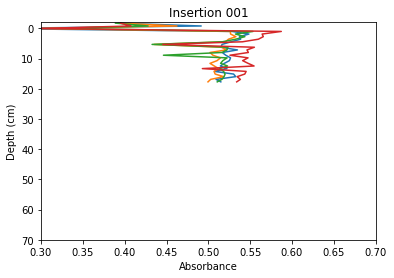

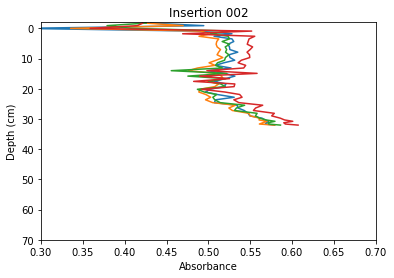

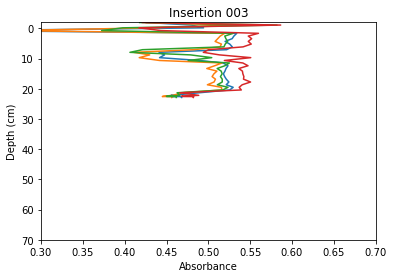

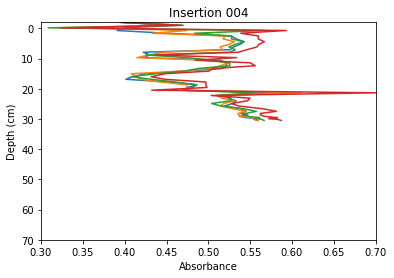

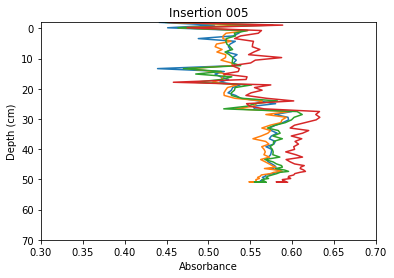

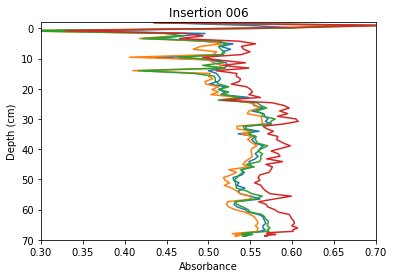

In [113]:
for i in range(len(dfs)):
    fig, ax = plt.subplots()
    ax.set_ylim(70.0, -2.0)
    ax.set_xlim(0.3, 0.7)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Absorbance")
    ax.set_title(f"Insertion {(i + 1):03d}")
    abs1550 = dfs[i].loc[:, 1550.0]
    abs1650 = dfs[i].loc[:, 1650.0]
    abs1750 = dfs[i].loc[:, 1750.0]
    abs1850 = dfs[i].loc[:, 1850.0]
    depth = dfs[i].loc[:, "depth"]
    ax.plot(abs1550, depth)
    ax.plot(abs1650, depth)
    ax.plot(abs1750, depth)
    ax.plot(abs1850, depth)

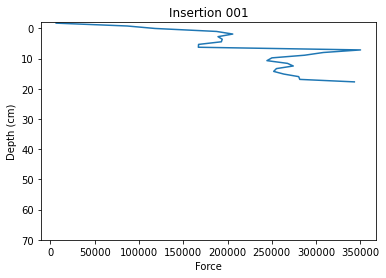

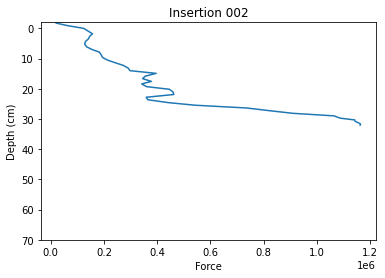

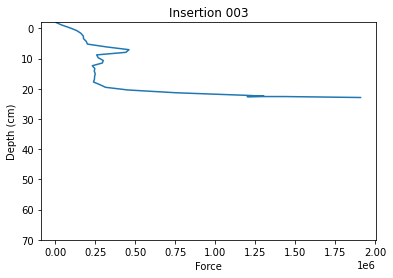

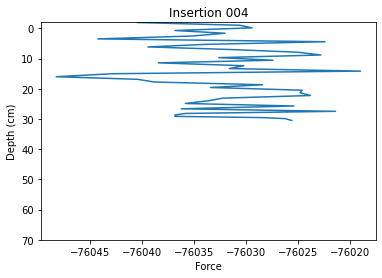

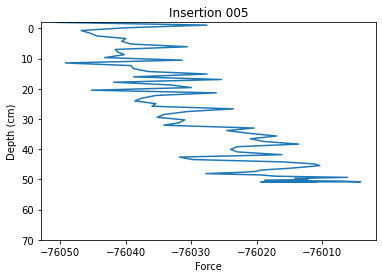

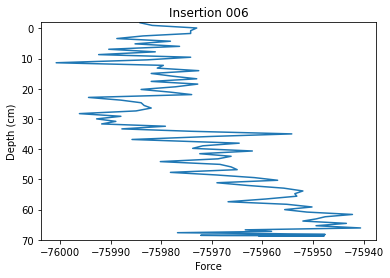

In [112]:
for i in range(len(dfs)):
    fig, ax = plt.subplots()
    ax.set_ylim(70.0, -2.0)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Force")
    ax.set_title(f"Insertion {(i + 1):03d}")
    
    force = dfs[i].loc[:, "force"]
    
    depth = dfs[i].loc[:, "depth"]
    ax.plot(force, depth)
    

In [114]:
h5_file['session002/cal002'].attrs.keys()

<KeysViewHDF5 ['calibration_start_time', 'dark_spectrum', 'nirone_averaging', 'nirone_light_source', 'nirone_measurement_time', 'nirone_spectrometer_connection', 'nirone_wavelengths_setting', 'spec1_wavelengths_vector', 'white_spectrum']>